# ECE232E Project 2

## 1. Structural Properties of the Facebook network: 

## QUESTION 1: A first look at the network:

## Question 1.1: Report the number of nodes and number of edges of the Facebook network.


In [1]:
library(igraph)
library(ggplot2)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# load talbe
fb = read.graph("facebook_combined.txt", directed=FALSE);
# number of edges
num_edges = gsize(fb);
print("The number of edges is:")
print(num_edges)
# number of nodes
num_nodes = gorder(fb);
print("The number of nodes is:")
print(num_nodes)

[1] "The number of edges is:"
[1] 88234
[1] "The number of nodes is:"
[1] 4039


## Question 1.2: Is the Facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [19]:
is_connected(fb)

[1] TRUE

## QUESTION 2: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.


In [20]:
diameter(fb, direct=FALSE);

[1] 8

## QUESTION 3:Plot the degree distribution of the facebook network and report the average degree.

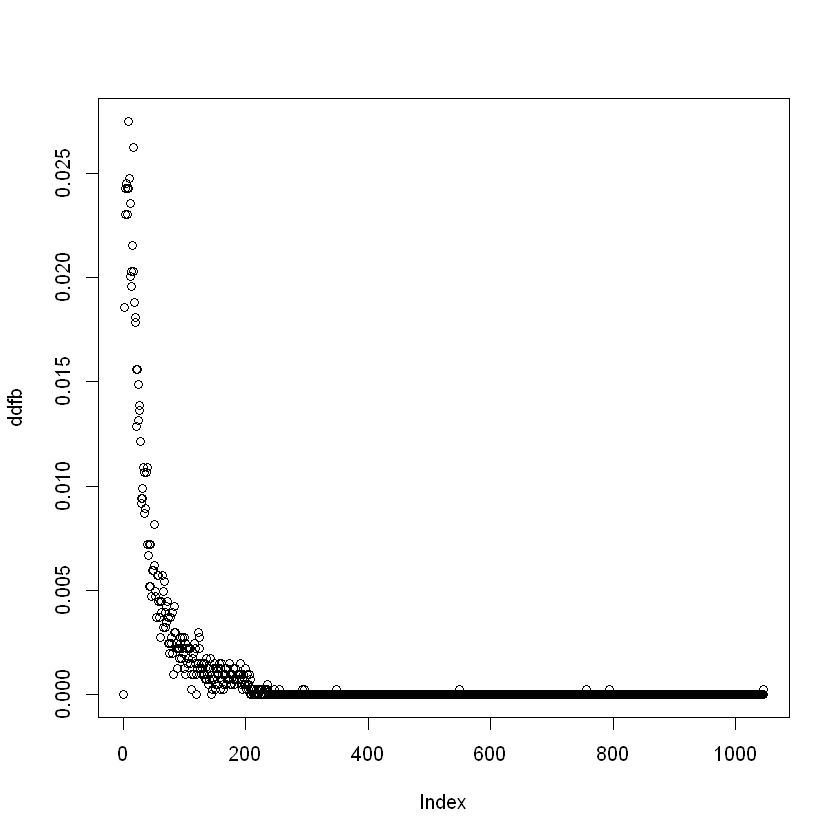

In [21]:
ddfb <- degree.distribution(fb)
plot(ddfb)

##  Question 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" 不是一個繪圖參數"

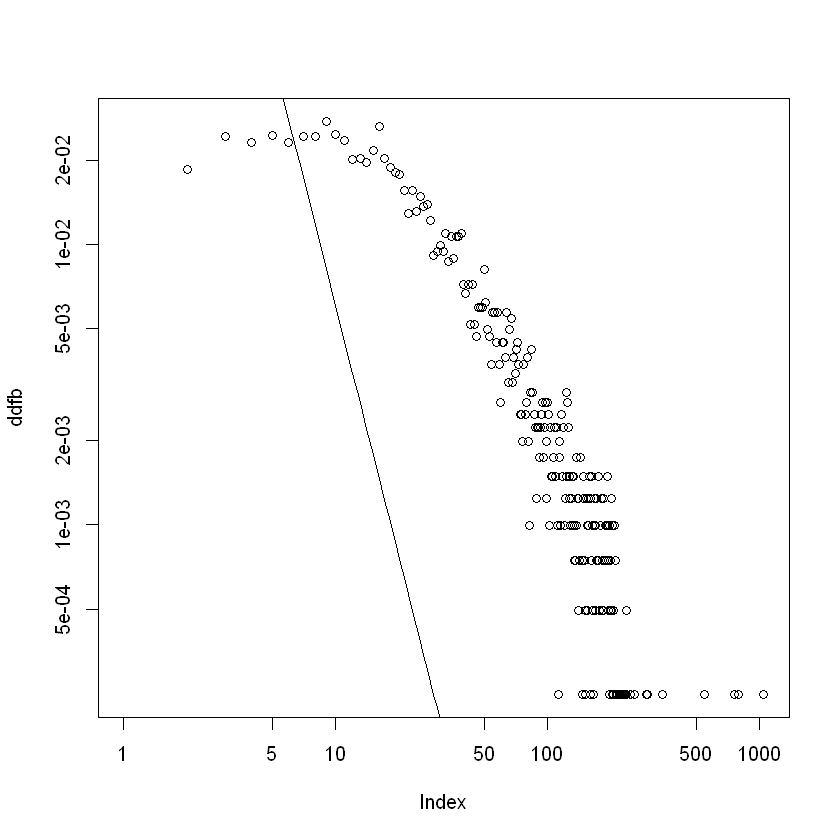

In [23]:
ddfb <- degree_distribution(fb)
plot(ddfb, log="xy")
lines(seq(1, length(ddfb)), 6*seq(1, length(ddfb))^(-3),main="Degree Distribution",xlab="Degree",ylab="Density", log='xy')

# 2. Personalized network

## QUESTION 5: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

[1] "The number of edges is:"
[1] 2866
[1] "The number of nodes is:"
[1] 348


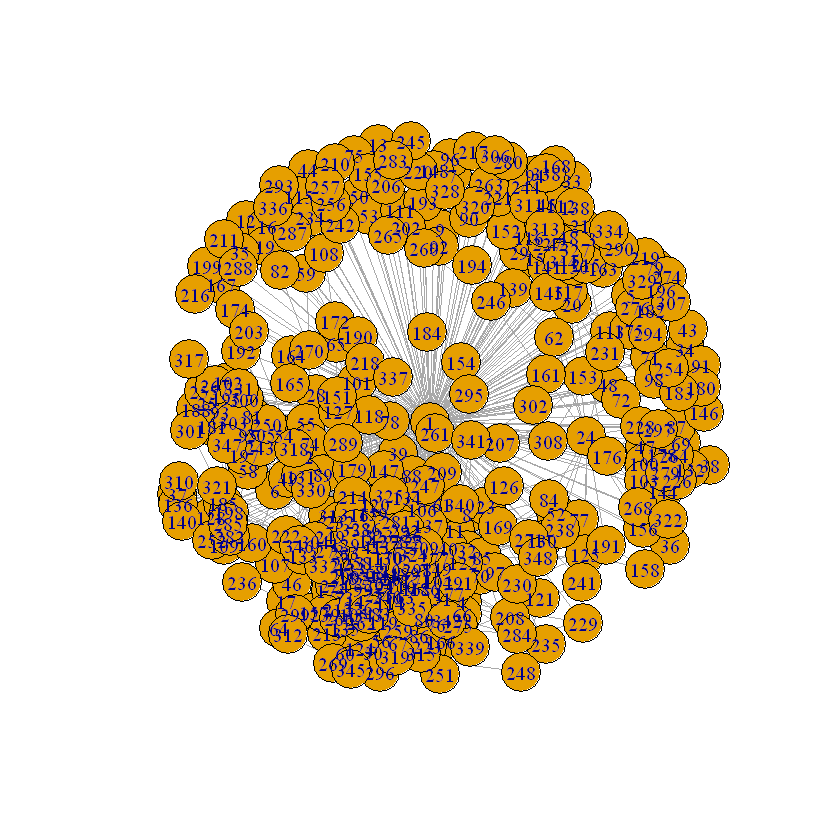

In [36]:
n = neighbors(fb, v=1)
pn<- induced_subgraph(fb, c(1, n))
plot(pn)
# number of edges
num_edges = gsize(pn);
print("The number of edges is:")
print(num_edges)
# number of nodes
num_nodes = gorder(pn);
print("The number of nodes is:")
print(num_nodes)

## QUESTION 6: What is the diameter of the personalized network?

In [37]:
diameter(pn)

[1] 2

## QUESTION 7: In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in Question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in Question 6 (assuming there are more than 3 nodes in the personalized network)?

# 3. Core node's personalized network

## QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [59]:
num_core = 0;
average = 0;
for (i in 1:4039){
    n = length(list(neighbors(fb, v=i))[[1]]);
    average = average + n;
    if(n >= 200){
        num_core = num_core + 1;
    }
}
average = average / 4039;

print("The number of core nodes is:")
print(num_core)
print("The average degree of nodes is:")
print(average)

[1] "The number of core nodes is:"
[1] 41
[1] "The average degree of nodes is:"
[1] 43.69101


## Question 9: For each of the above core node's personalized network, nd the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node's personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to dierent communities should have different color. In this question, you should have 15 plots in total.

[1] "Node ID 1:"


[1] 0.4131014

[1] 0.3533022

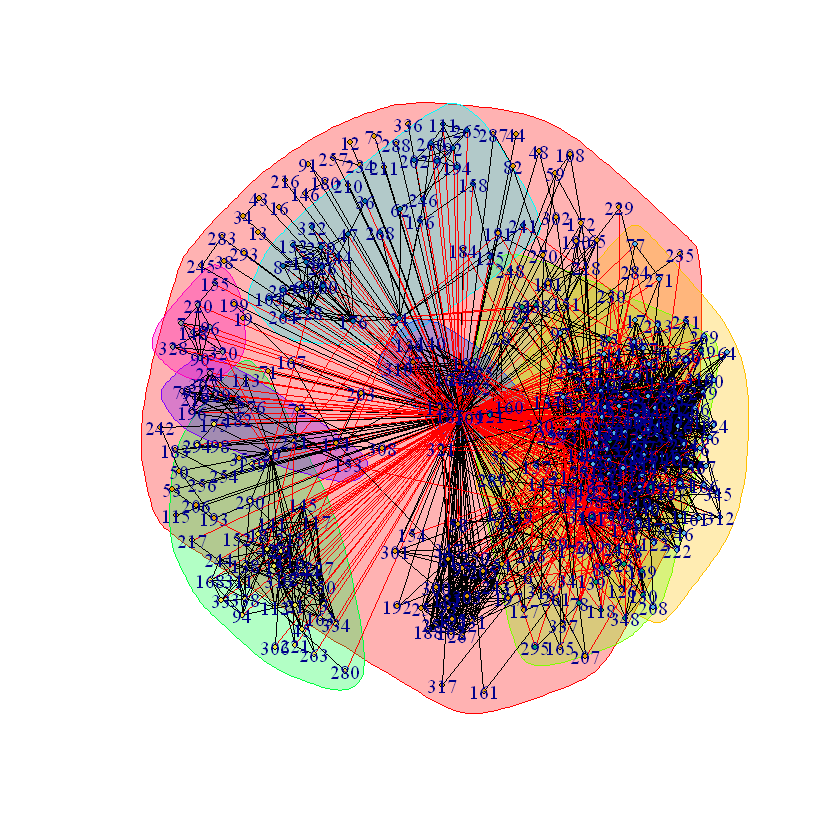

[1] 0.3941254

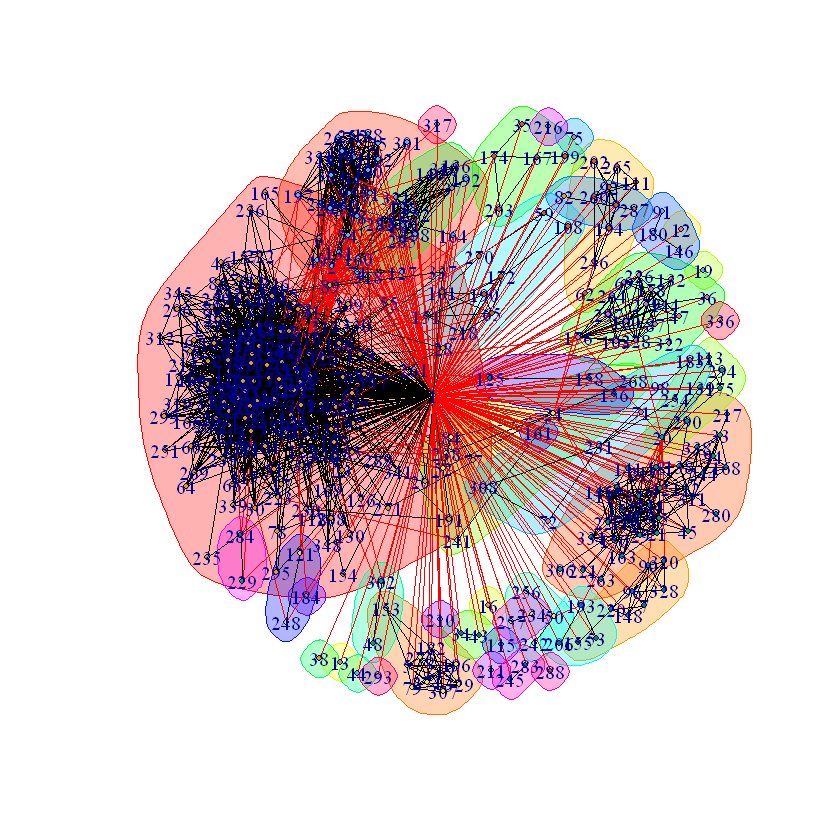

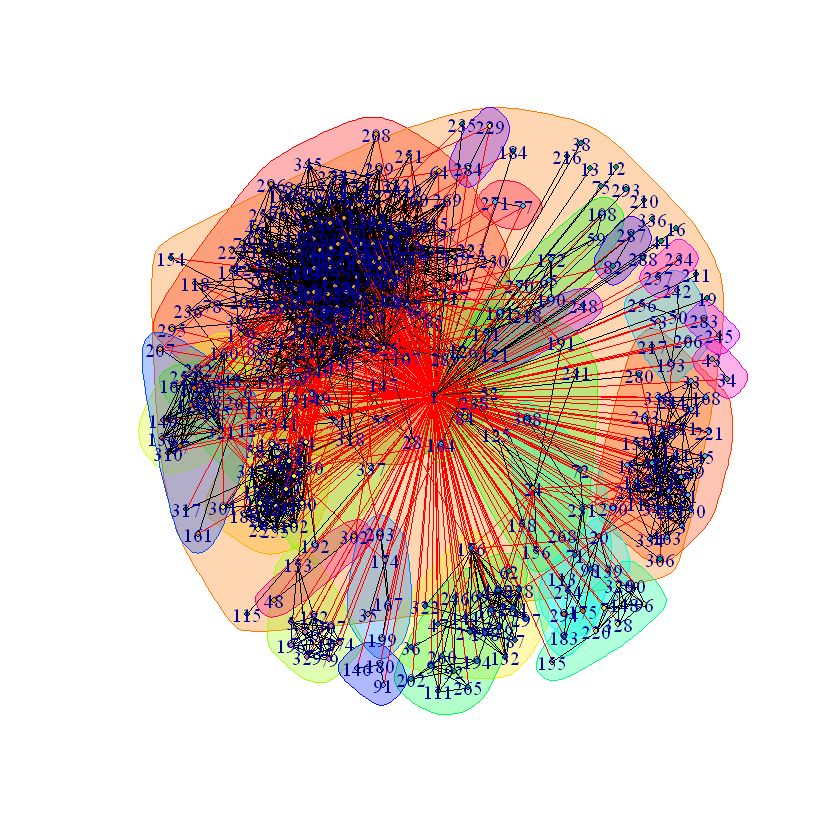

In [7]:
#for 1
n1 = neighbors(fb, v=1);
pn1<- induced_subgraph(fb, c(1, n1));
print("Node ID 1:")
modularity(pn1, membership(cluster_fast_greedy(pn1)))
plot(cluster_fast_greedy(pn1), pn1, vertex.size=2)
modularity(pn1, membership(cluster_edge_betweenness(pn1)))
plot(cluster_edge_betweenness(pn1), pn1, vertex.size=2)
modularity(pn1, membership(cluster_infomap(pn1)))
plot(cluster_infomap(pn1), pn1, vertex.size=2)

[1] "Node ID 108:"


[1] 0.4359294

[1] 0.5067549

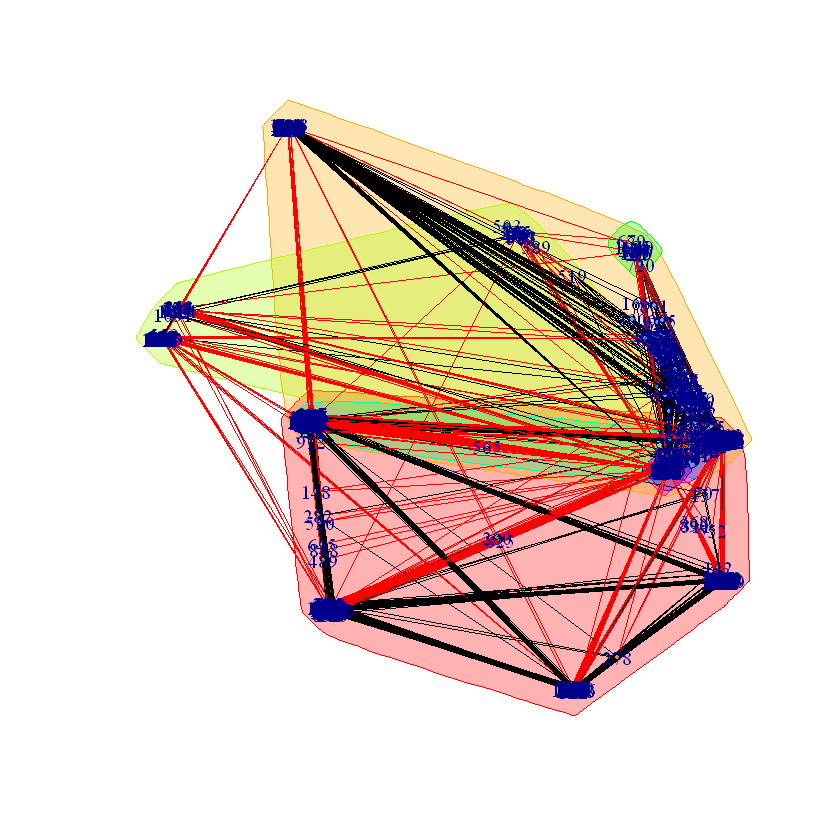

[1] 0.5082492

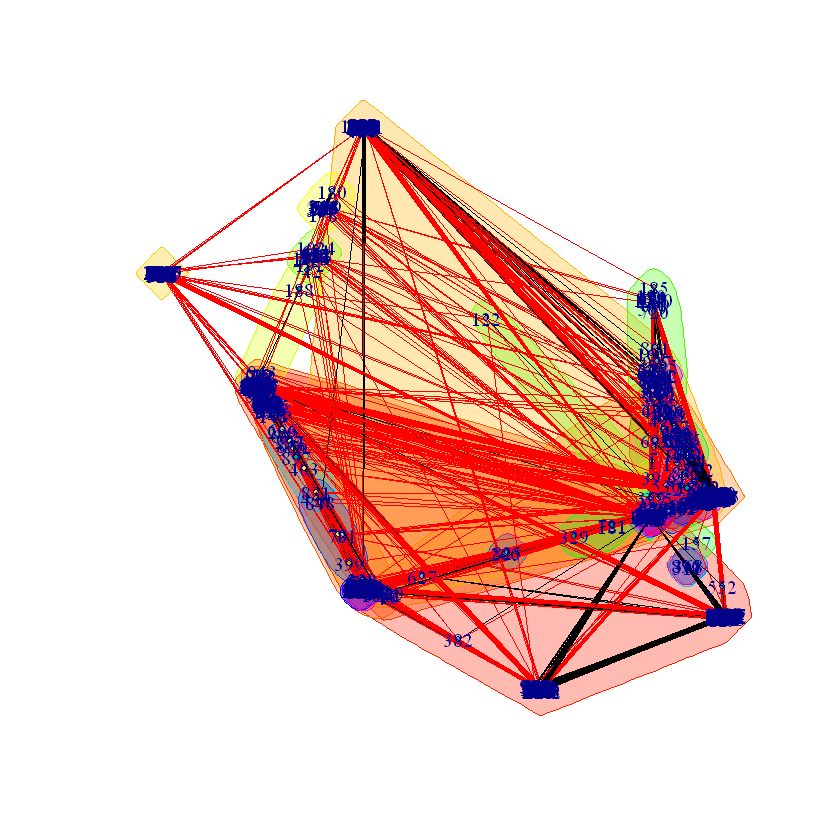

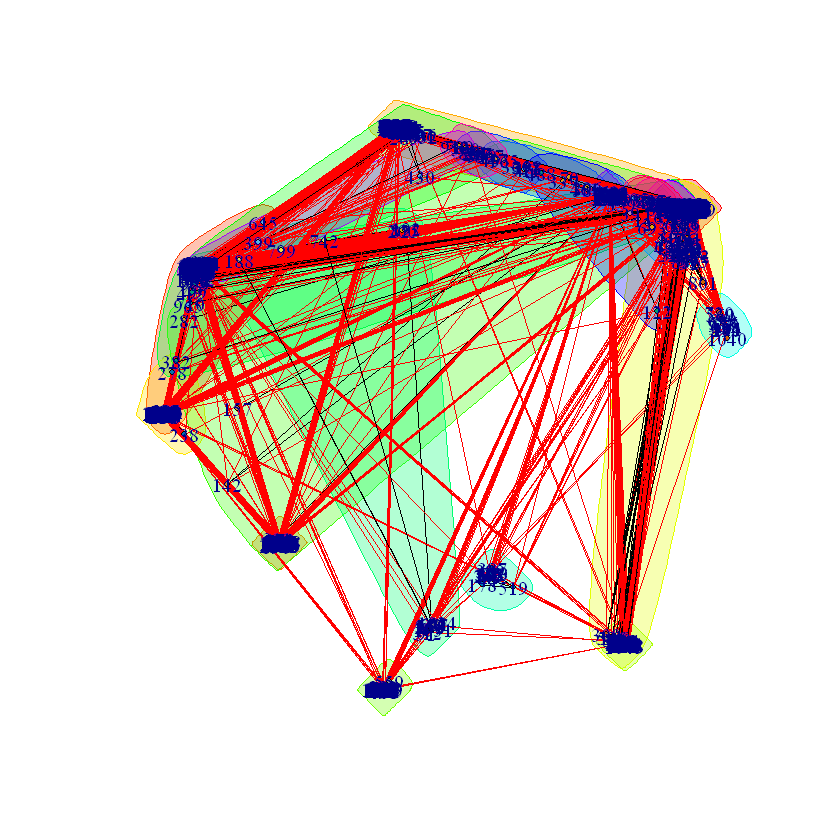

In [8]:
#for 108
n108 = neighbors(fb, v=108);
pn108<- induced_subgraph(fb, c(108, n108));
print("Node ID 108:")
modularity(pn108, membership(cluster_fast_greedy(pn108)))
plot(cluster_fast_greedy(pn108), pn108, vertex.size=2)
modularity(pn108, membership(cluster_edge_betweenness(pn108)))
plot(cluster_edge_betweenness(pn108), pn108, vertex.size=2)
modularity(pn108, membership(cluster_infomap(pn108)))
plot(cluster_infomap(pn108), pn108, vertex.size=2)

[1] "Node ID: 349:"


[1] 0.2517149

[1] 0.133528

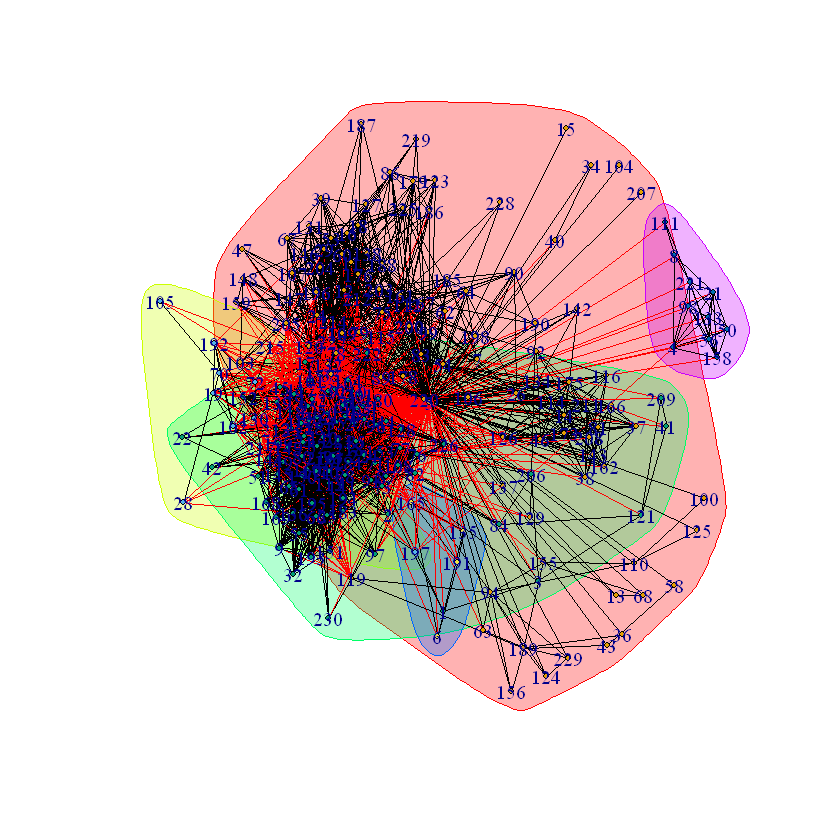

[1] 0.0954642

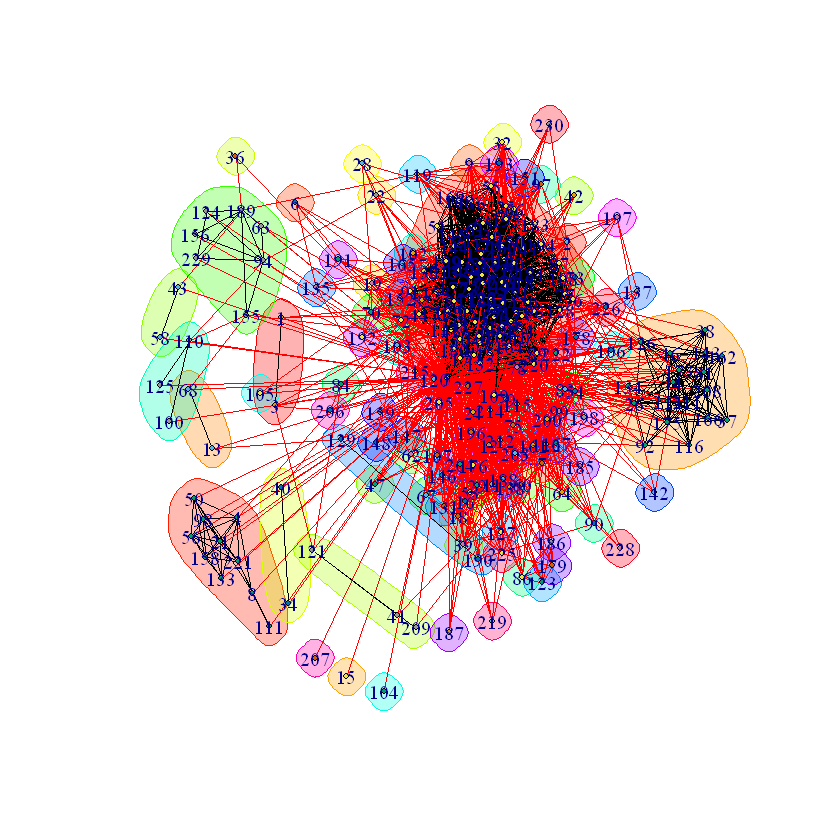

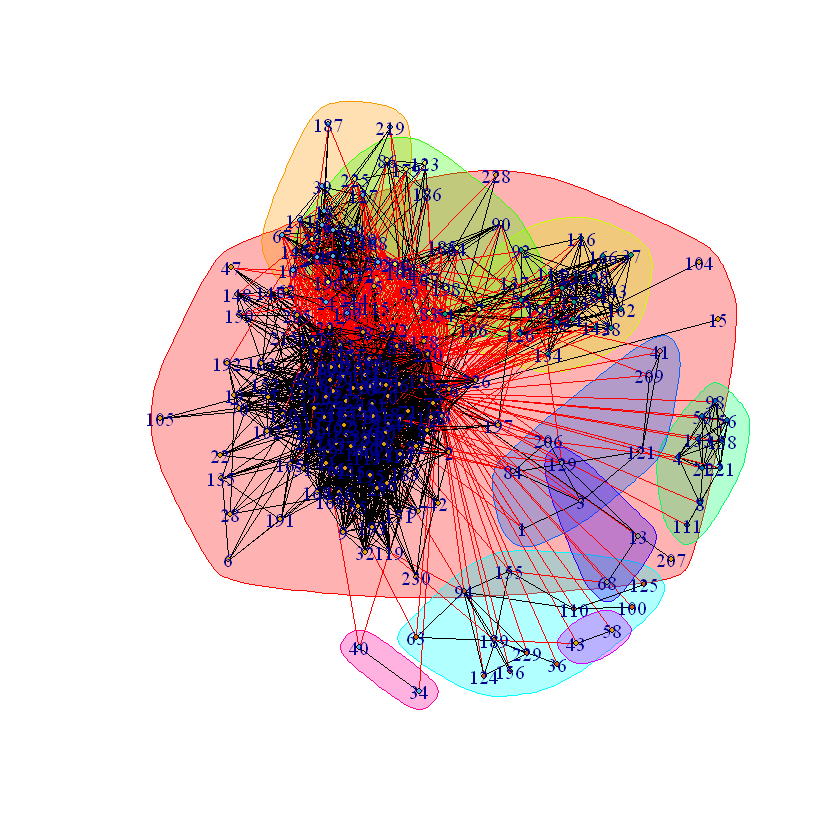

In [9]:
#for 349
n349 = neighbors(fb, v=349);
pn349<- induced_subgraph(fb, c(349, n349));
print("Node ID: 349:")
modularity(pn349, membership(cluster_fast_greedy(pn349)))
plot(cluster_fast_greedy(pn349), pn349, vertex.size=2)
modularity(pn349, membership(cluster_edge_betweenness(pn349)))
plot(cluster_edge_betweenness(pn349), pn349, vertex.size=2)
modularity(pn349, membership(cluster_infomap(pn349)))
plot(cluster_infomap(pn349), pn349, vertex.size=2)

[1] "Node ID 484:"


[1] 0.5070016

[1] 0.4890952

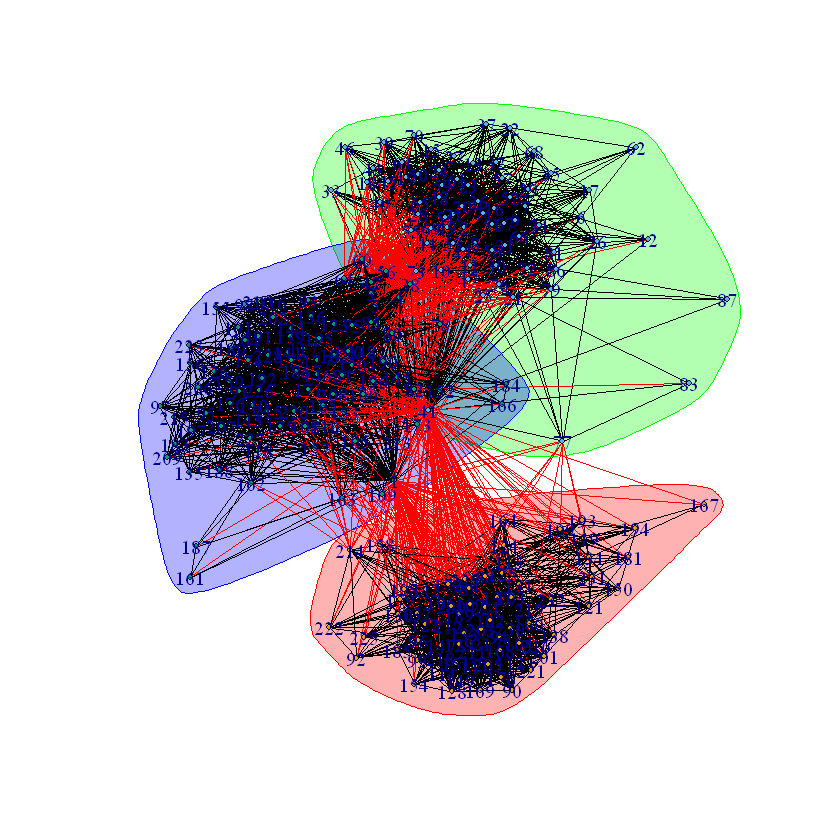

[1] 0.5152788

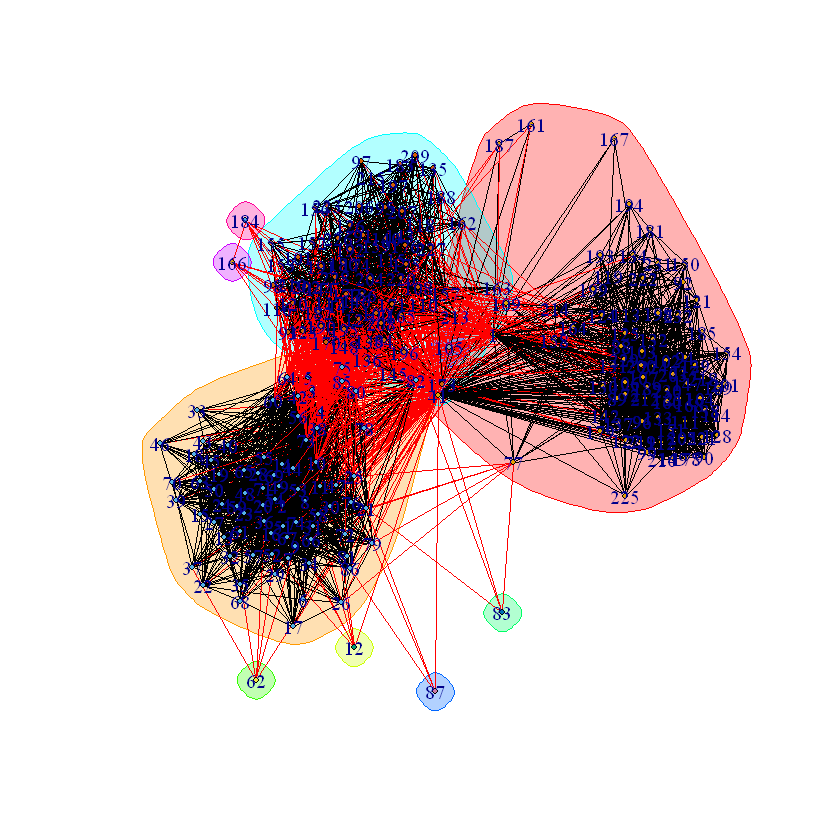

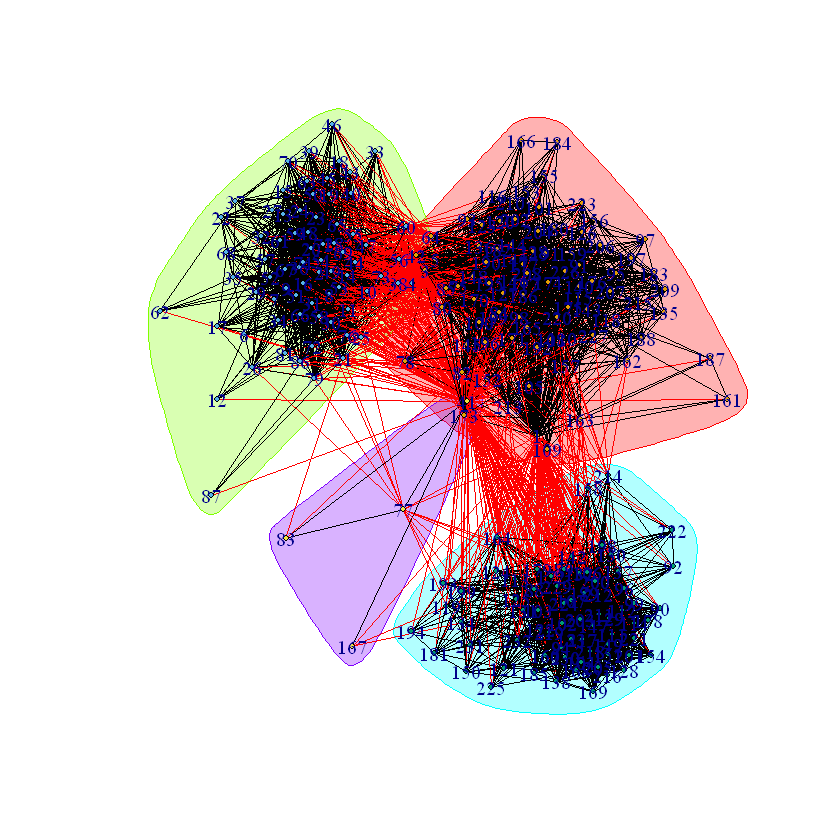

In [10]:
#for 484
n484 = neighbors(fb, v=484);
pn484<- induced_subgraph(fb, c(484, n484));
print("Node ID 484:")
modularity(pn484, membership(cluster_fast_greedy(pn484)))
plot(cluster_fast_greedy(pn484), pn484, vertex.size=2)
modularity(pn484, membership(cluster_edge_betweenness(pn484)))
plot(cluster_edge_betweenness(pn484), pn484, vertex.size=2)
modularity(pn484, membership(cluster_infomap(pn484)))
plot(cluster_infomap(pn484), pn484, vertex.size=2)

[1] "Node ID 1087:"


[1] 0.1455315

[1] 0.02762377

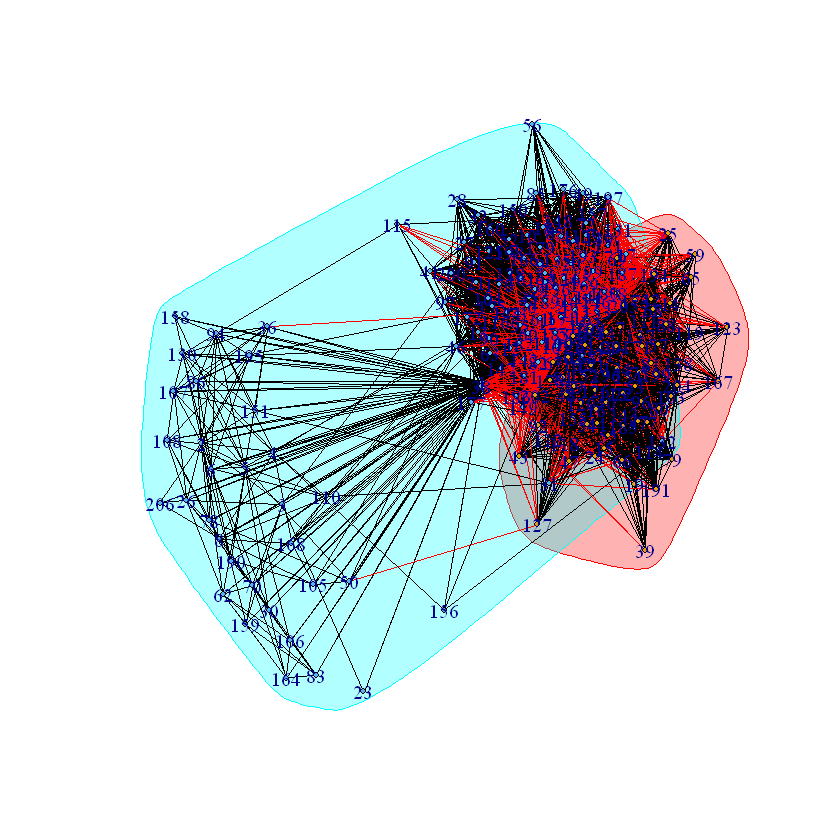

[1] 0.02690662

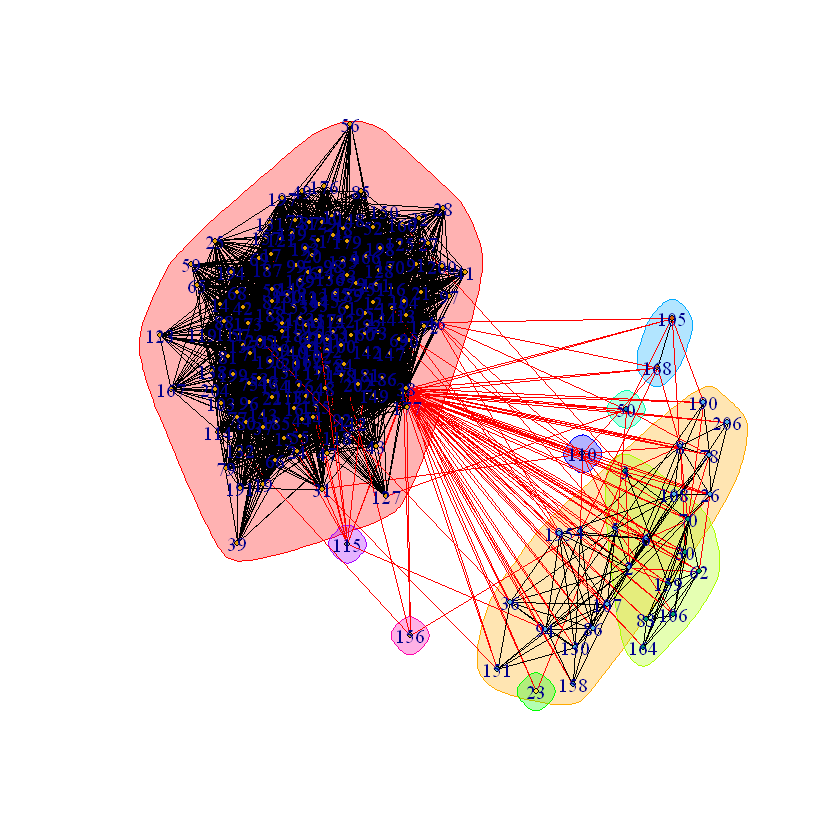

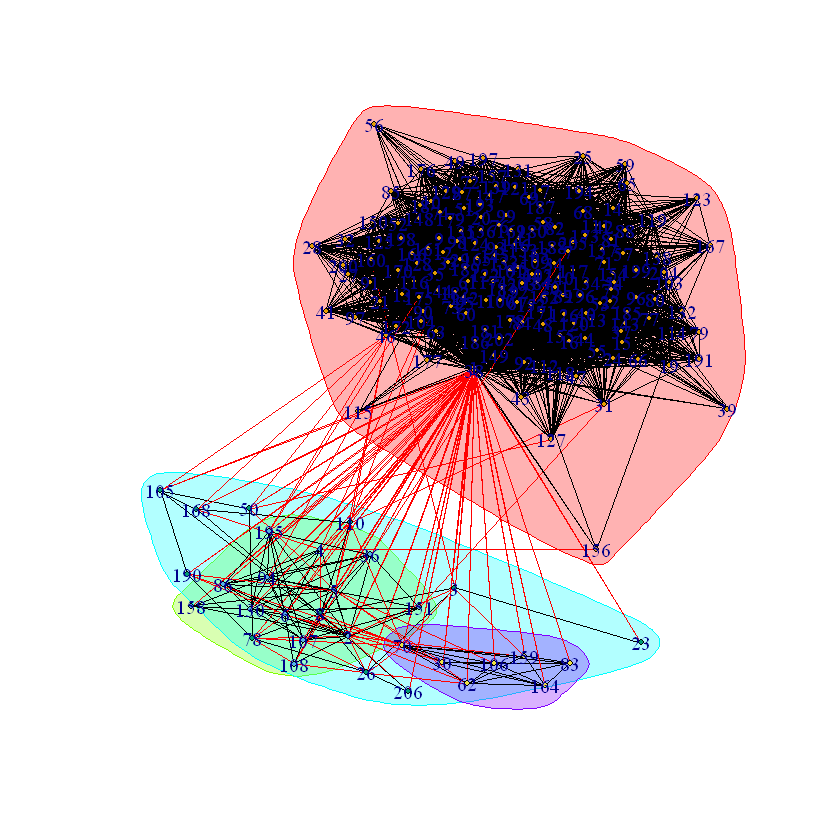

In [11]:
#for 1087
n1087 = neighbors(fb, v=1087);
pn1087<- induced_subgraph(fb, c(1087, n1087));
print("Node ID 1087:")
modularity(pn1087, membership(cluster_fast_greedy(pn1087)))
plot(cluster_fast_greedy(pn1087), pn1087, vertex.size=2)
modularity(pn1087, membership(cluster_edge_betweenness(pn1087)))
plot(cluster_edge_betweenness(pn1087), pn1087, vertex.size=2)
modularity(pn1087, membership(cluster_infomap(pn1087)))
plot(cluster_infomap(pn1087), pn1087, vertex.size=2)

## QUESTION 10: For each of the core node's personalized network (use same core nodes as Question 9), remove the core node from the personalized network and and the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modied personalized network using colors. In this question, you should have 15 plots in total.

[1] "Node ID 1:"


[1] 0.4418533

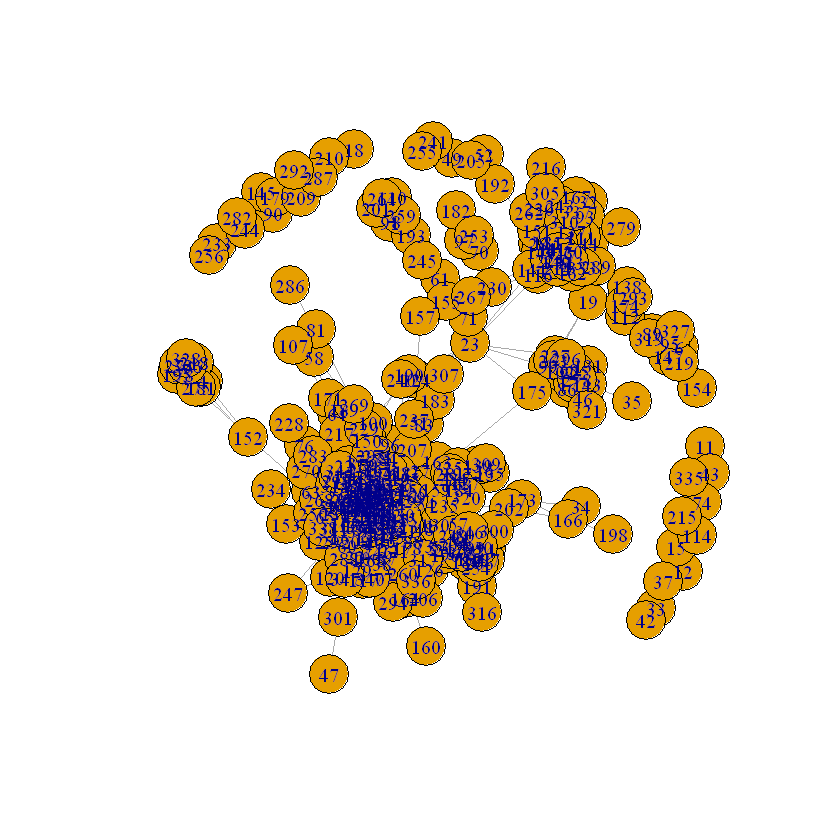

[1] 0.4161461

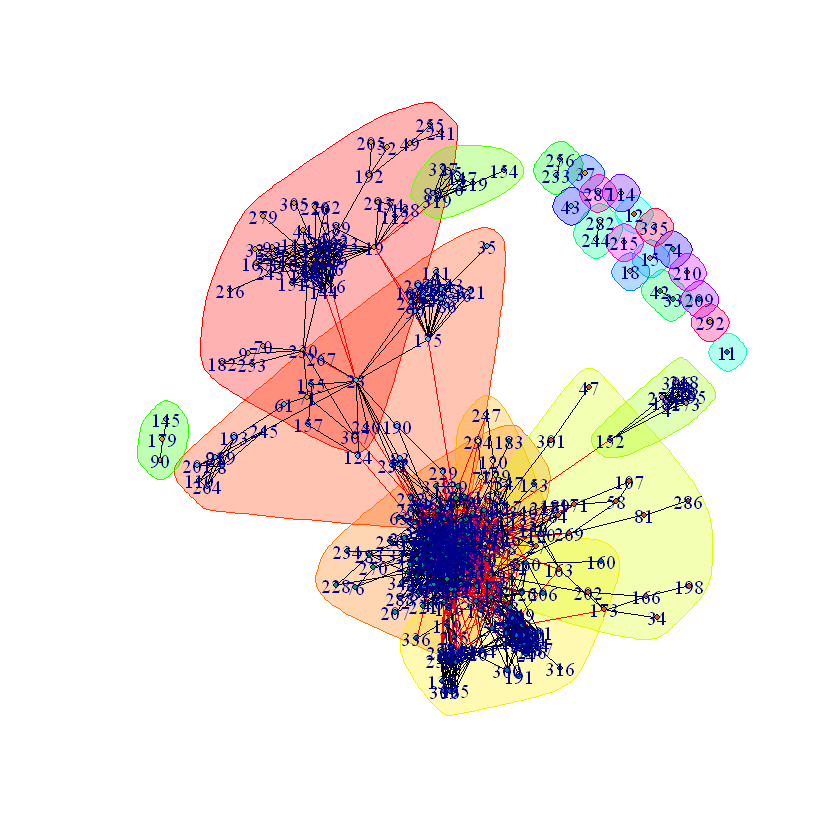

[1] 0.4180077

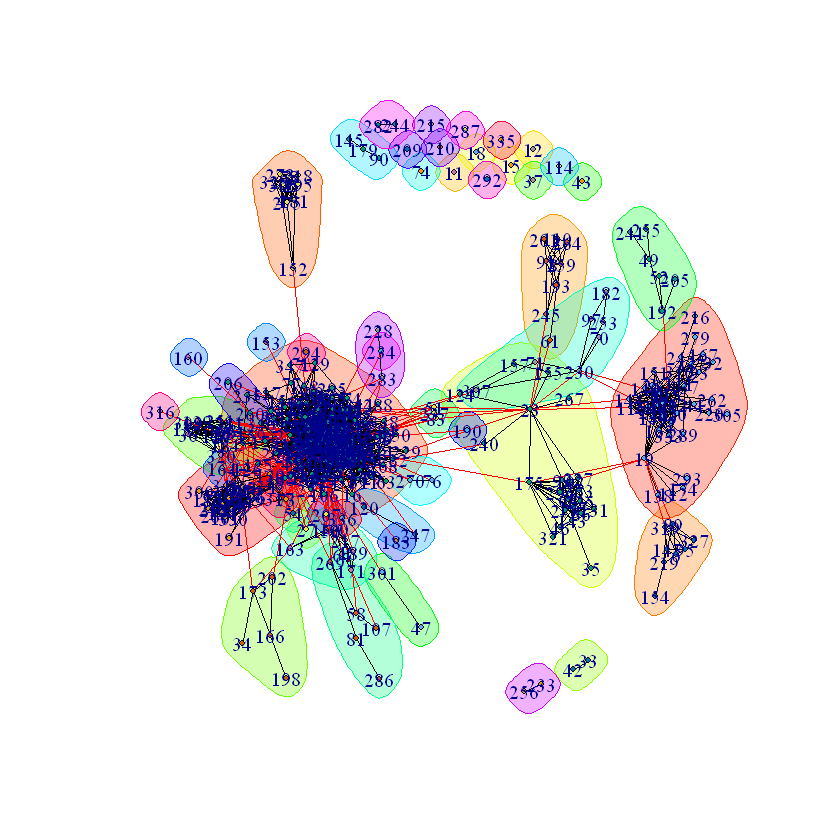

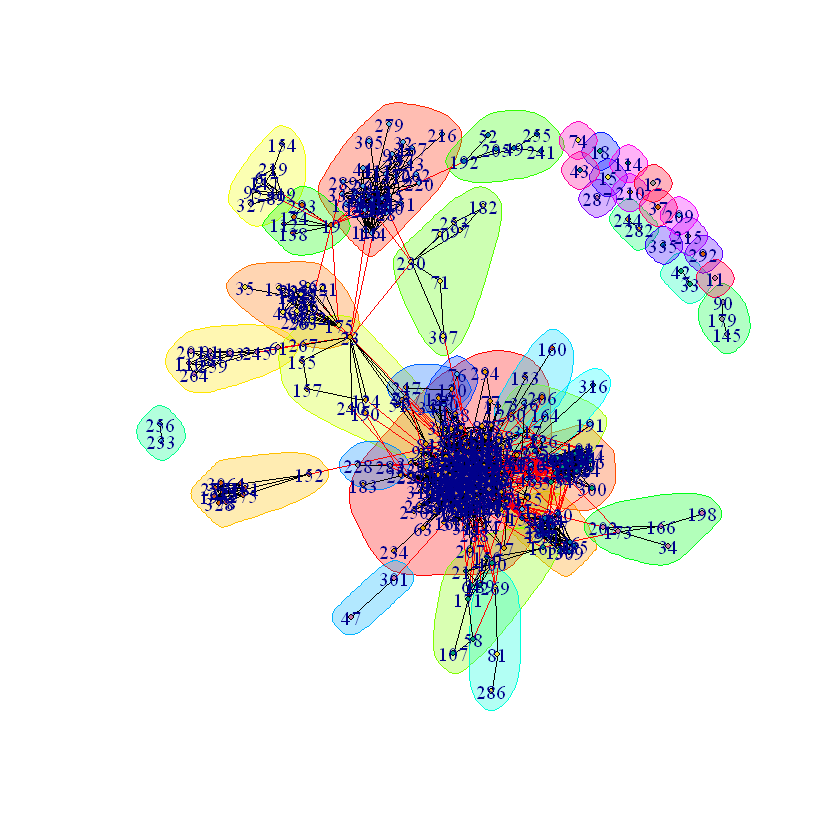

In [19]:
# for 1
n1 = neighbors(fb, v=1);
pn1<- induced_subgraph(fb, c(1, n1));
npn1 <- delete_vertices(pn1, 1);
print("Node ID 1:")
plot(npn1)
modularity(npn1, membership(cluster_fast_greedy(npn1)))
plot(cluster_fast_greedy(npn1), npn1, vertex.size=2)
modularity(npn1, membership(cluster_edge_betweenness(npn1)))
plot(cluster_edge_betweenness(npn1), npn1, vertex.size=2)
modularity(npn1, membership(cluster_infomap(npn1)))
plot(cluster_infomap(npn1), npn1, vertex.size=2)

[1] "Node ID 108:"


[1] 0.4359515

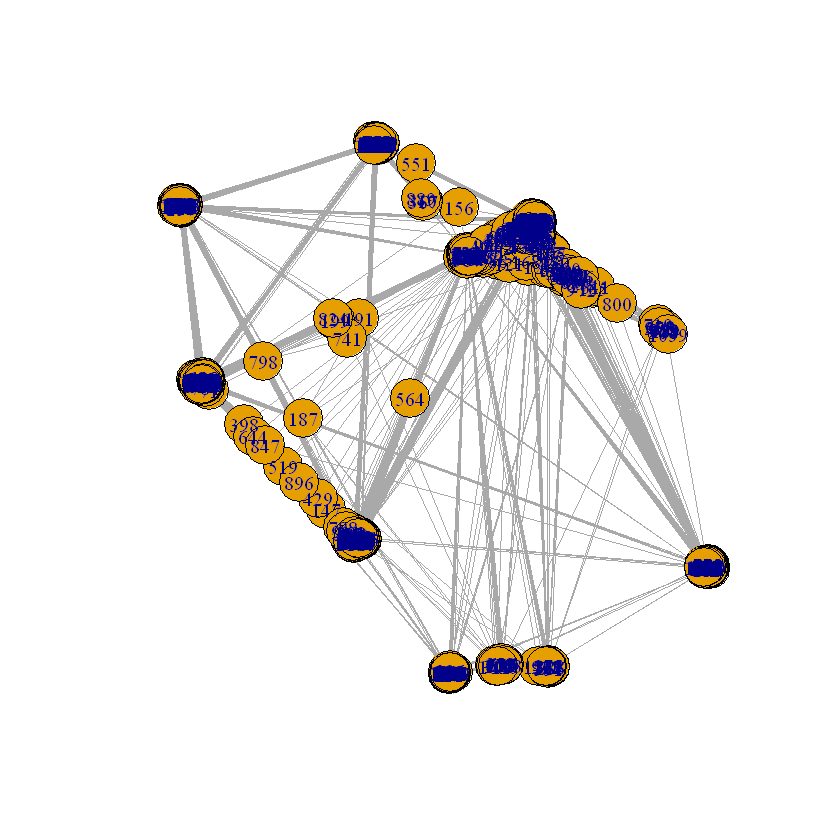

[1] 0.5056361

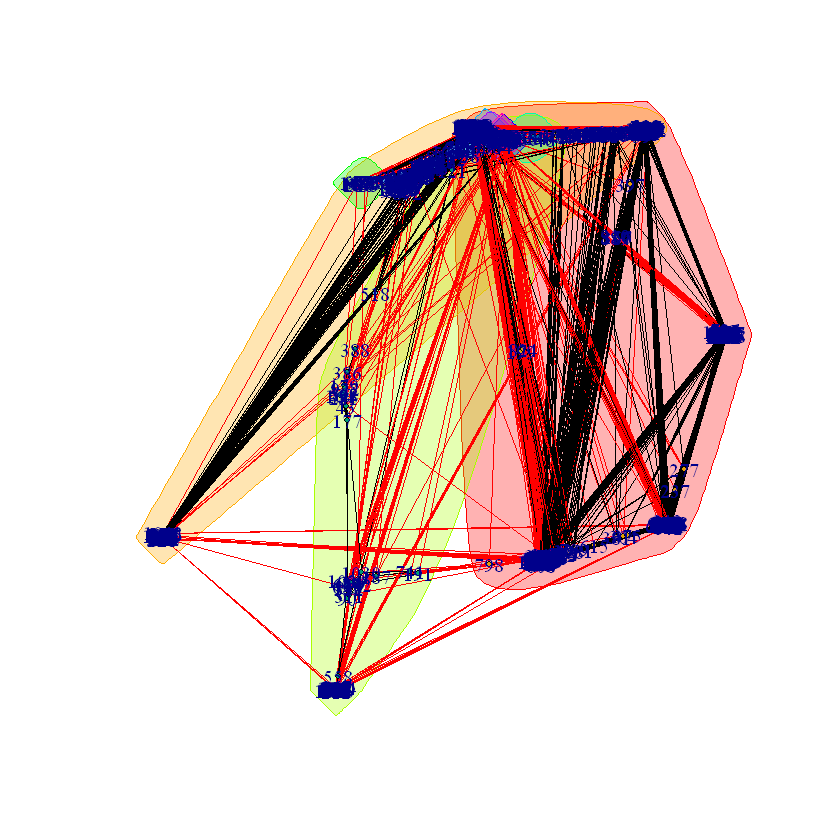

[1] 0.5081681

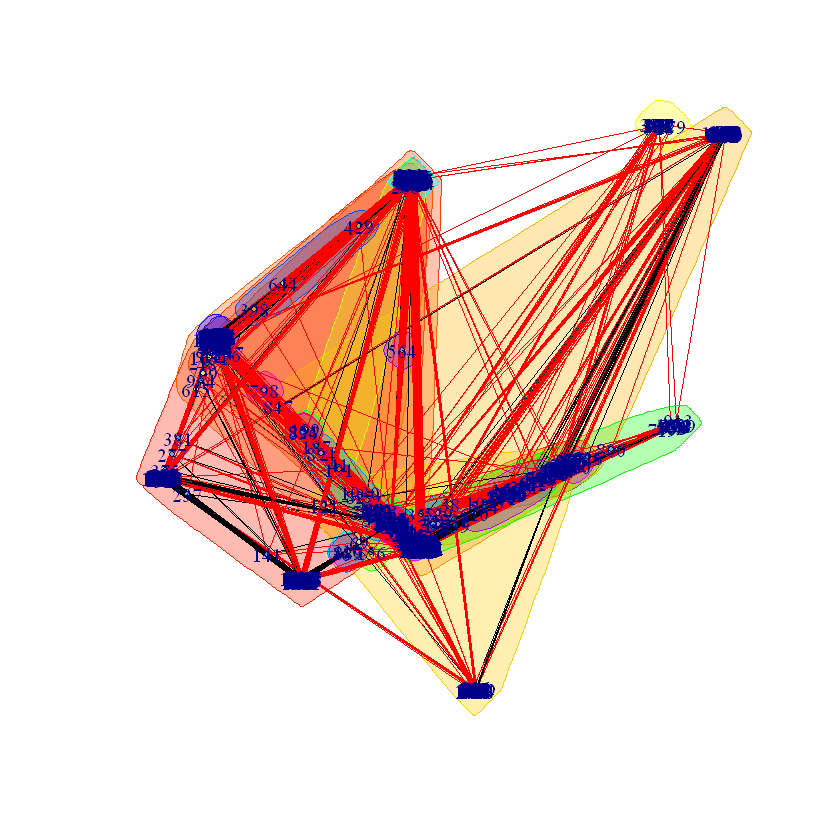

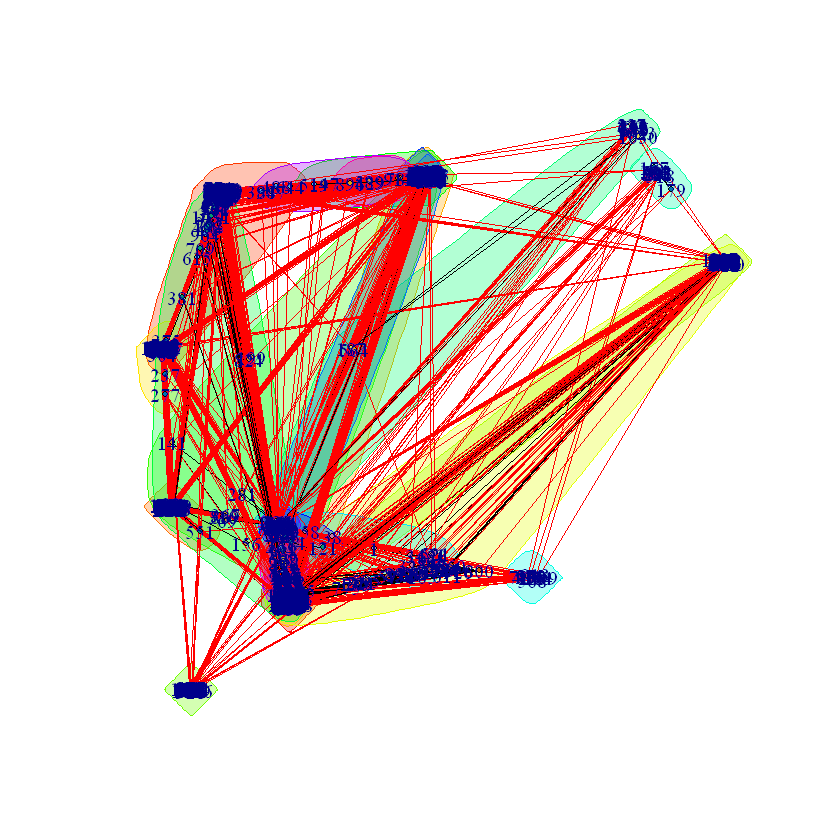

In [3]:
#for 108
n108 = neighbors(fb, v=108);
pn108<- induced_subgraph(fb, c(108, n108));
npn108 <- delete_vertices(pn108, 1);
print("Node ID 108:")
plot(npn108)
modularity(npn108, membership(cluster_fast_greedy(npn108)))
plot(cluster_fast_greedy(npn108), npn108, vertex.size=2)
modularity(npn108, membership(cluster_edge_betweenness(npn108)))
plot(cluster_edge_betweenness(npn108), npn108, vertex.size=2)
modularity(npn108, membership(cluster_infomap(npn108)))
plot(cluster_infomap(npn108), npn108, vertex.size=2)

  [1]  349   35  108  174  199  350  351  352  353  354  355  356  357  358  359
 [16]  360  361  362  363  364  365  366  367  368  369  370  371  372  373  374
 [31]  375  376  377  378  379  380  381  382  383  384  385  386  387  388  389
 [46]  390  391  392  393  394  395  396  397  398  399  400  401  402  403  404
 [61]  405  406  407  408  409  410  411  412  413  414  415  416  417  418  419
 [76]  420  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [91]  435  436  437  438  439  440  441  442  443  444  445  446  447  448  449
[106]  450  451  452  453  454  455  456  457  458  459  460  461  462  463  464
[121]  465  466  467  468  469  470  471  472  473  474  475  476  477  478  479
[136]  480  481  482  483  484  485  486  487  488  489  490  491  492  493  494
[151]  495  496  497  498  499  500  501  502  503  504  505  506  507  508  509
[166]  510  511  512  513  514  515  516  517  518  519  520  521  522  523  524
[181]  525  526  527  528  5

[1] 0.257489

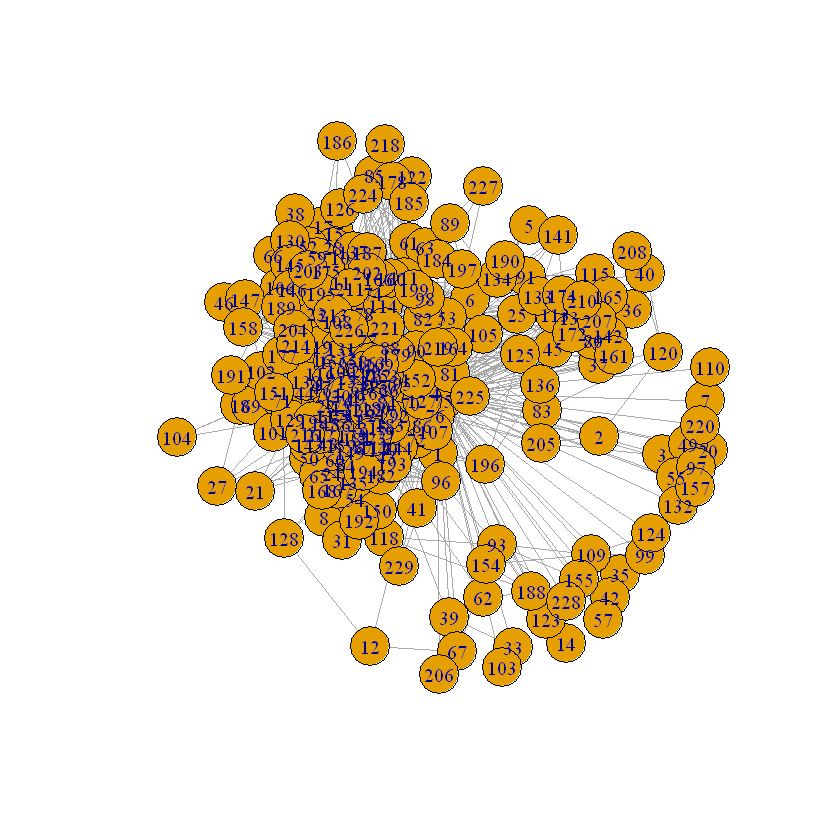

[1] 0.1337295

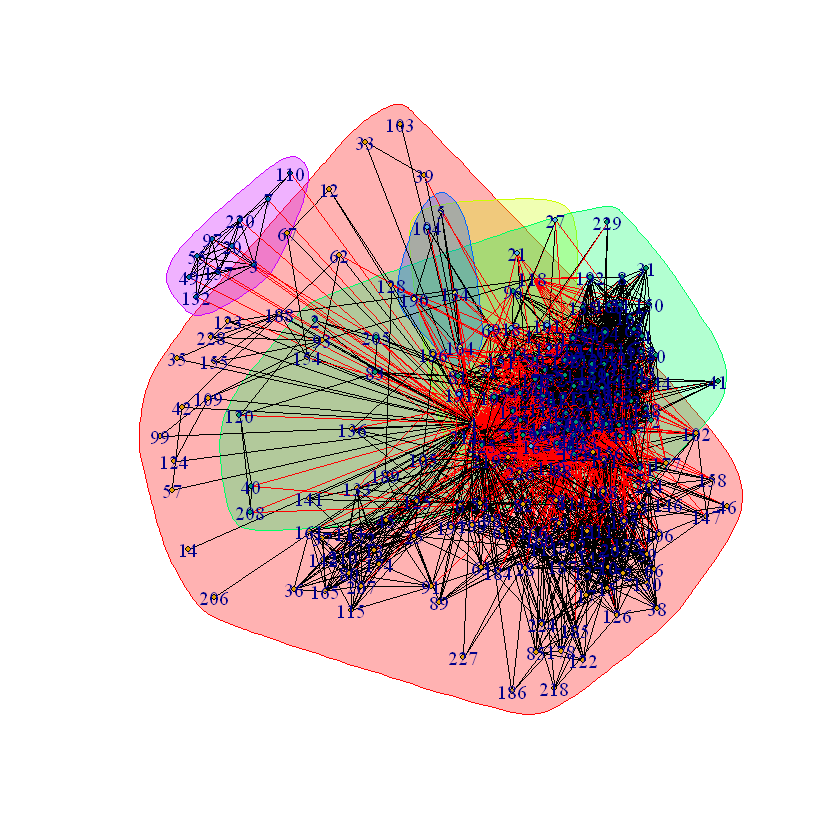

[1] 0.09509536

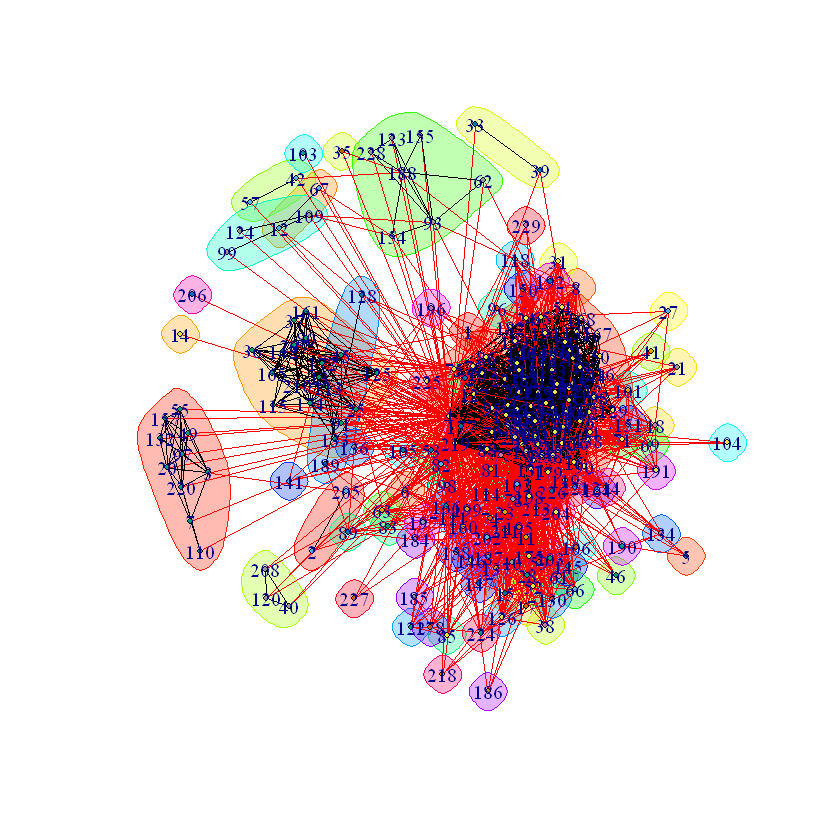

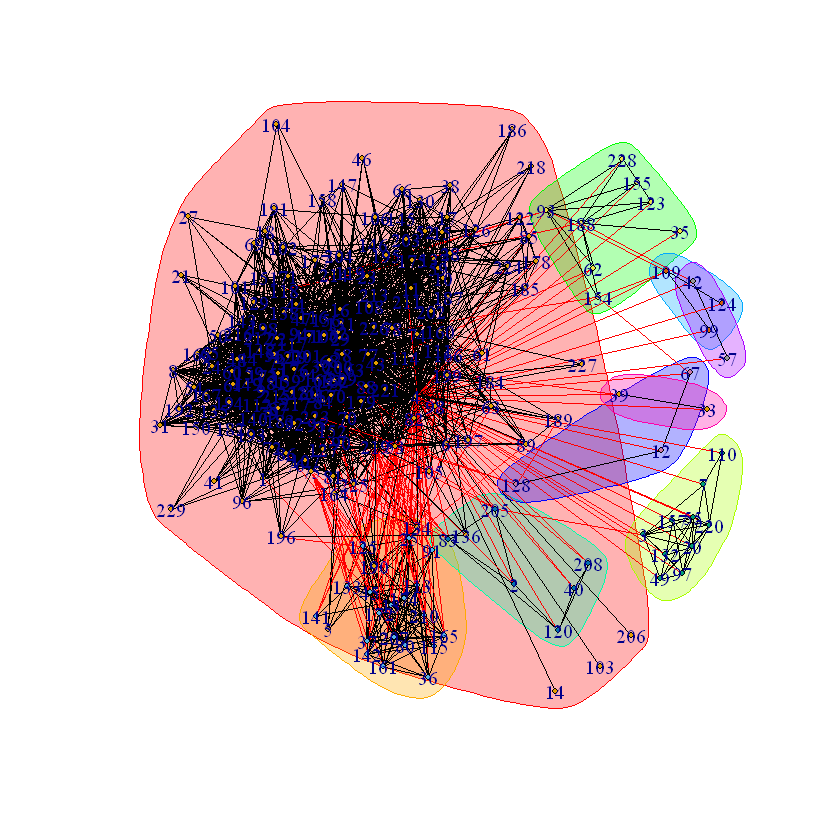

In [4]:
# for 349
n349 = neighbors(fb, v=349);
print(c(349,n349))
pn349<- induced_subgraph(fb, c(349, n349));
npn349 <- delete_vertices(pn349, 1);
print("Node ID 349:")
plot(npn349)
modularity(npn349, membership(cluster_fast_greedy(npn349)))
plot(cluster_fast_greedy(npn349), npn349, vertex.size=2)
modularity(npn349, membership(cluster_edge_betweenness(npn349)))
plot(cluster_edge_betweenness(npn349), npn349, vertex.size=2)
modularity(npn349, membership(cluster_infomap(npn349)))
plot(cluster_infomap(npn349), npn349, vertex.size=2)

[1] "Node ID 484:"


[1] 0.5211308

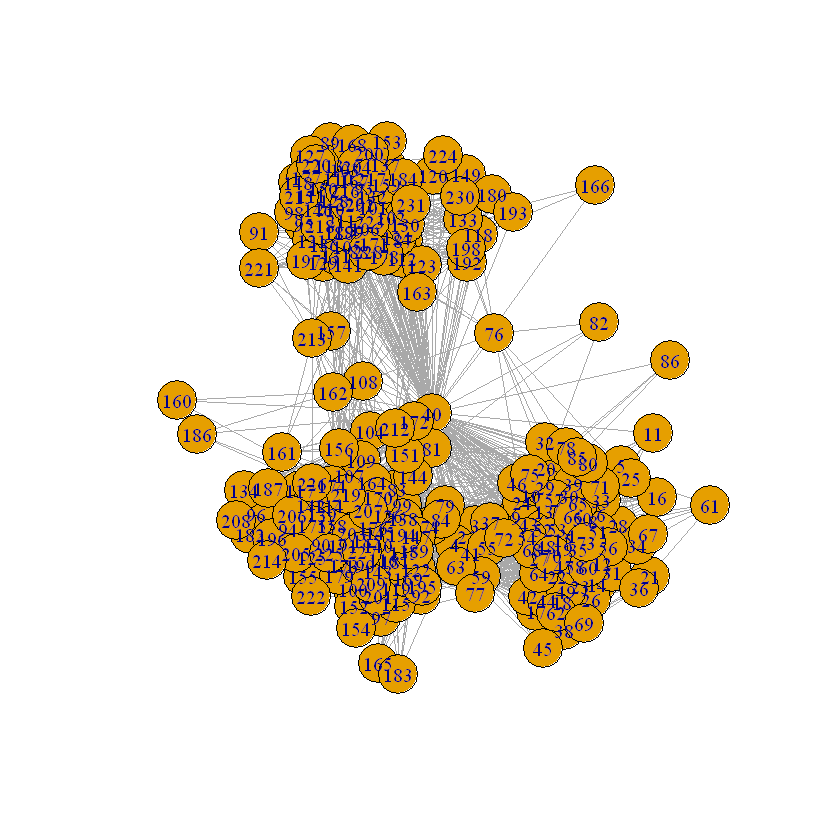

[1] 0.4956171

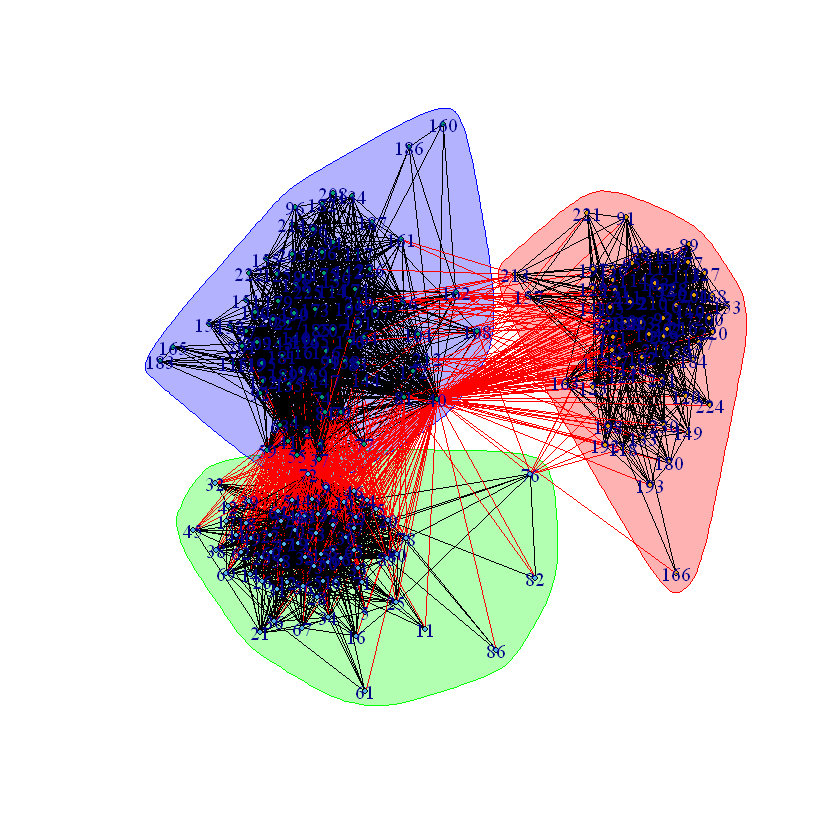

[1] 0.5291475

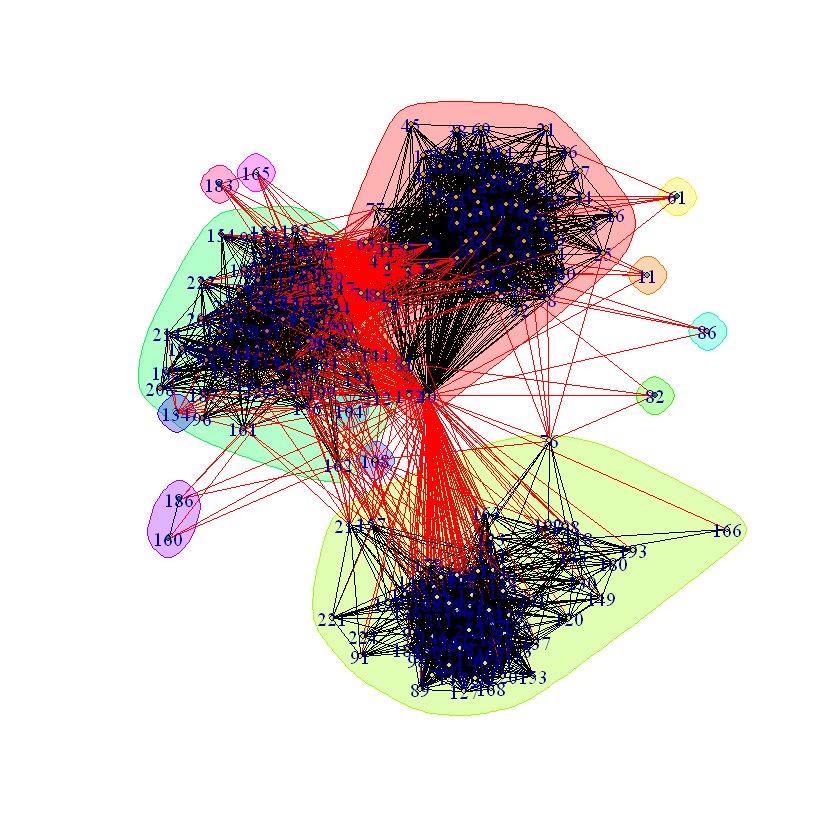

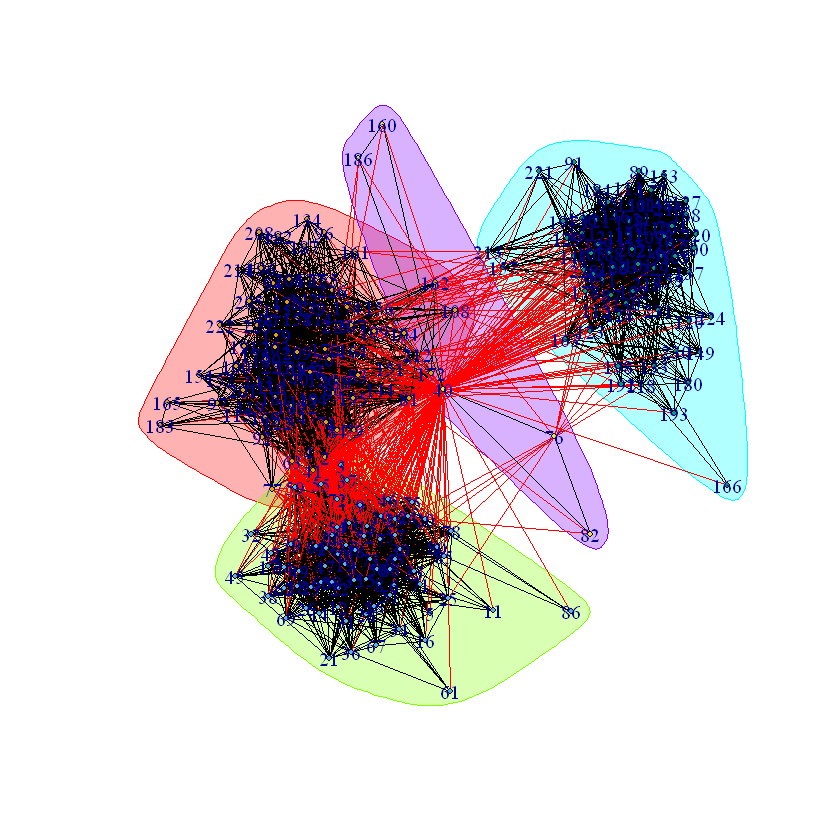

In [5]:
#for 484
n484 = neighbors(fb, v=484);
pn484<- induced_subgraph(fb, c(484, n484));
npn484 <- delete_vertices(pn484, 1);
print("Node ID 484:")
plot(npn484)
modularity(npn484, membership(cluster_fast_greedy(npn484)))
plot(cluster_fast_greedy(npn484), npn484, vertex.size=2)
modularity(npn484, membership(cluster_edge_betweenness(npn484)))
plot(cluster_edge_betweenness(npn484), npn484, vertex.size=2)
modularity(npn484, membership(cluster_infomap(npn484)))
plot(cluster_infomap(npn484), npn484, vertex.size=2)

[1] "Node ID 1087:"


[1] 0.1481956

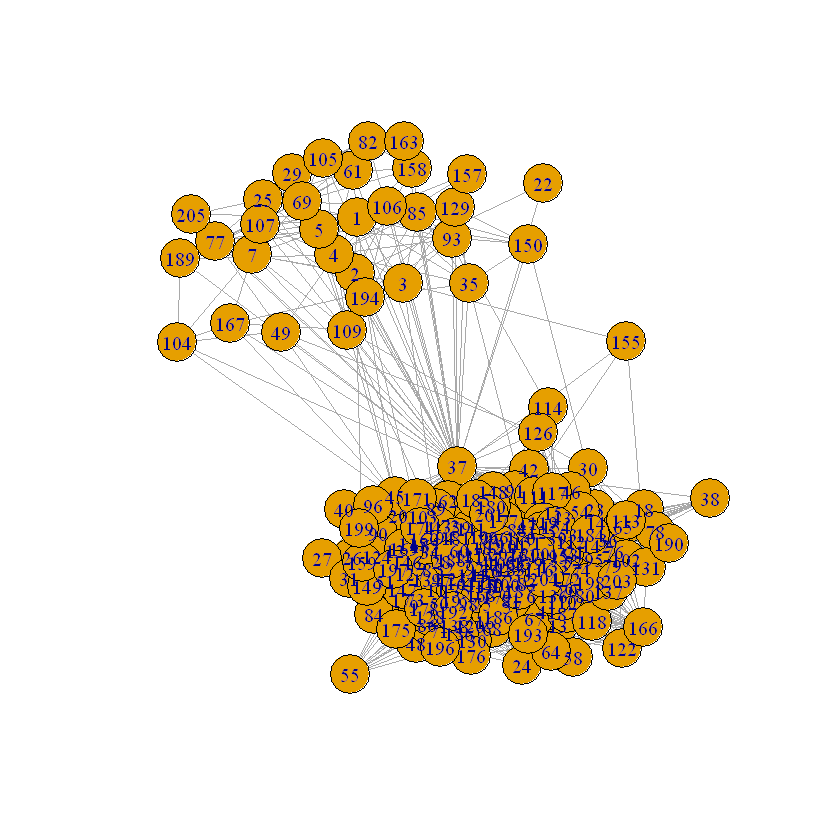

[1] 0.0324953

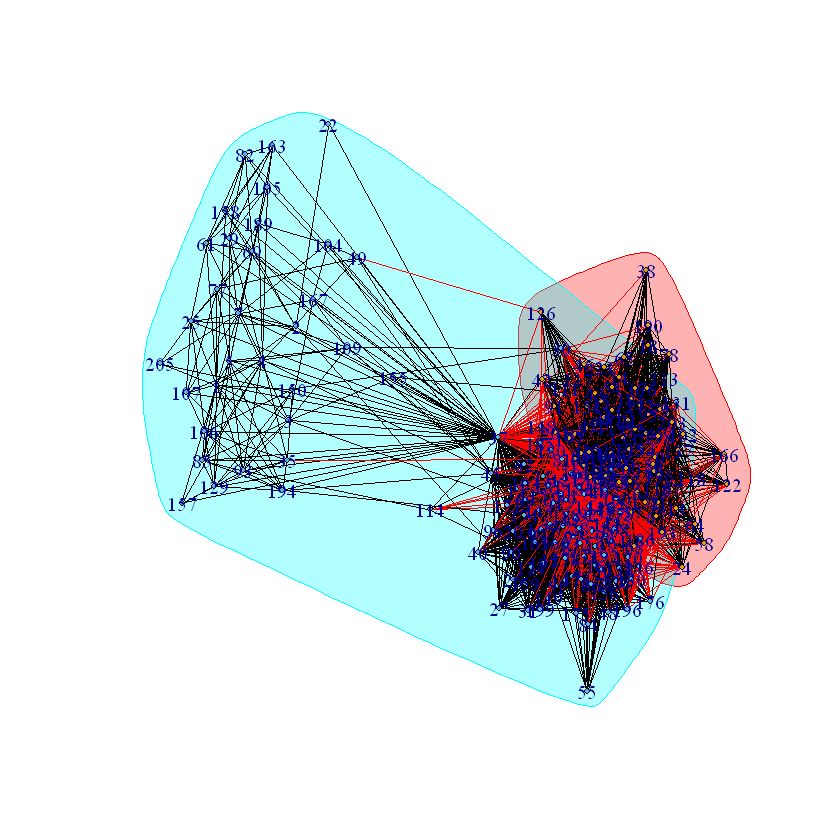

[1] 0.02737159

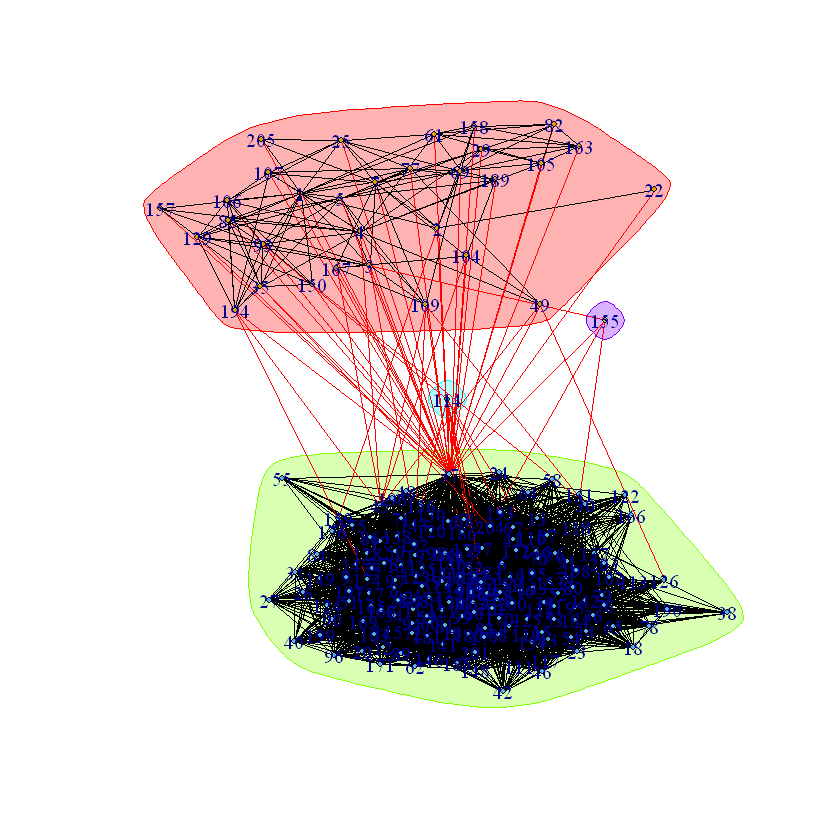

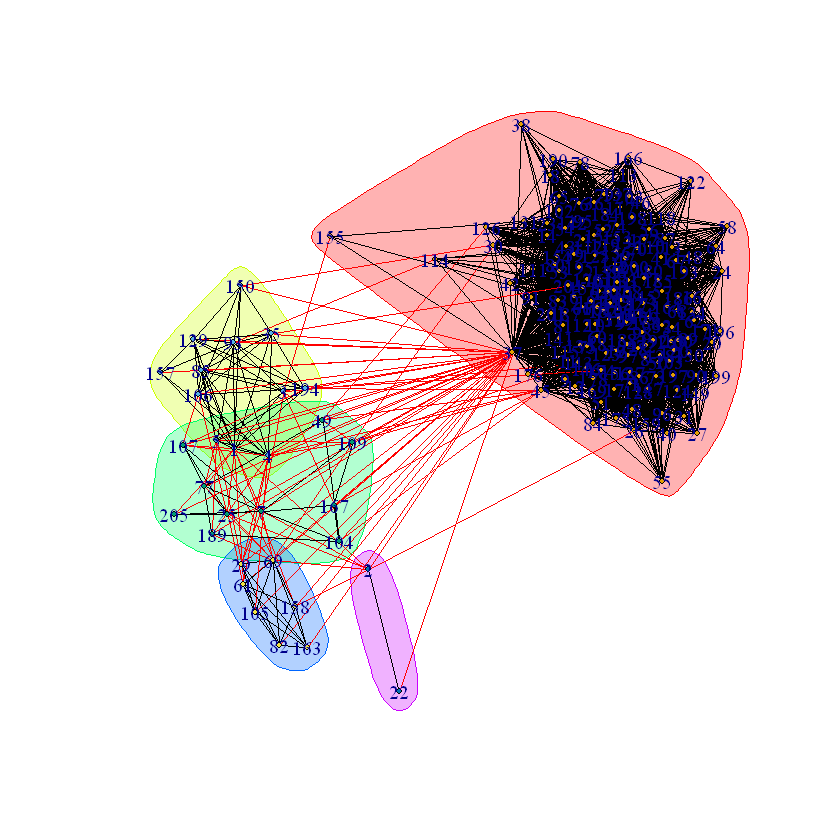

In [6]:
#for 1087
n1087 = neighbors(fb, v=1087);
pn1087<- induced_subgraph(fb, c(1087, n1087));
npn1087 <- delete_vertices(pn1087, 1)
print("Node ID 1087:")
plot(npn1087)
modularity(npn1087, membership(cluster_fast_greedy(npn1087)))
plot(cluster_fast_greedy(npn1087), npn1087, vertex.size=2)
modularity(npn1087, membership(cluster_edge_betweenness(npn1087)))
plot(cluster_edge_betweenness(npn1087), npn1087, vertex.size=2)
modularity(npn1087, membership(cluster_infomap(npn1087)))
plot(cluster_infomap(npn1087), npn1087, vertex.size=2)

## QUESTION 12: For each of the core node's personalized network (use the same core nodes as Question 9), plot the distribution histogram of embeddedness and dispersion. In this question, you will have 10 plots.

In [3]:
# for 1
n1 = neighbors(fb, v=1);
pn1<- induced_subgraph(fb, c(1, n1));
npn1 <- delete_vertices(pn1, 1);
n11 = list(neighbors(pn1,v=1))[[1]];
#print(n11)
int <- rep(1,gorder(pn1));
dist <- rep(1,gorder(pn1));

for (i in 2:gorder(pn1)){
    ni = list(neighbors(pn1,v=i))[[1]];
    intl = intersect(ni,n11);
    int[i] = length(intersect(ni,n11));
}

In [4]:
dist <- seq_len(0)
for (i in 2:gorder(pn1)){
    n11 = neighbors(pn1,v=1);
    ni = neighbors(pn1,v=i);
    intl = intersect(ni,n11);
    npni <- induced_subgraph(pn1,intl)
    distan <- distances(npni, v=V(npni), to=V(npni))
    distan[is.infinite(distan)] <- 0
    distan <- sum(distan)/2
    dist = c(dist, distan)
}

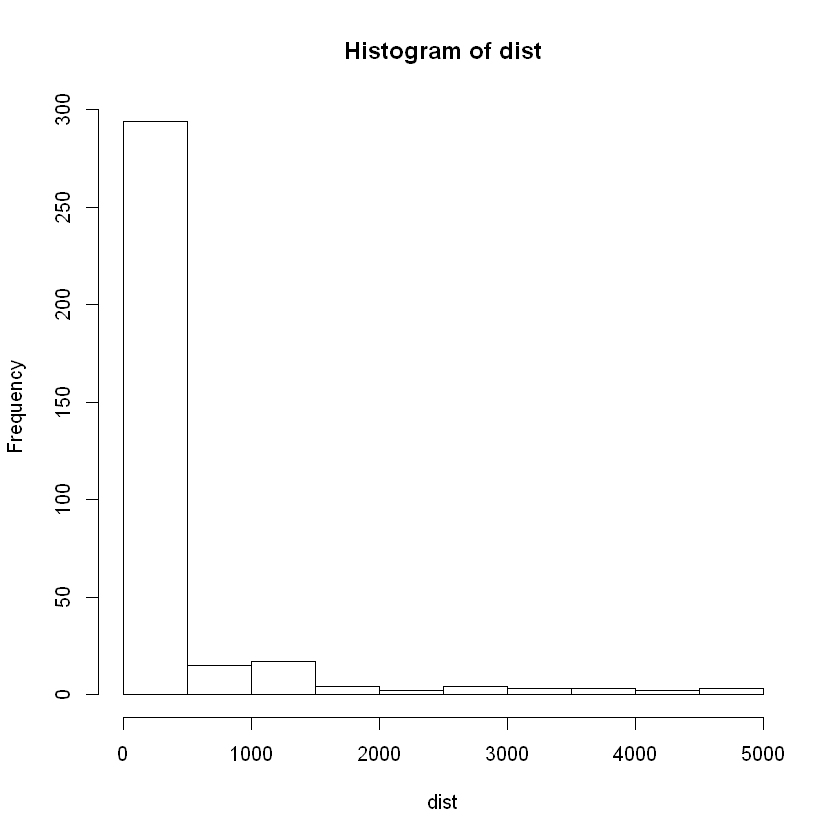

In [162]:
hist(dist)

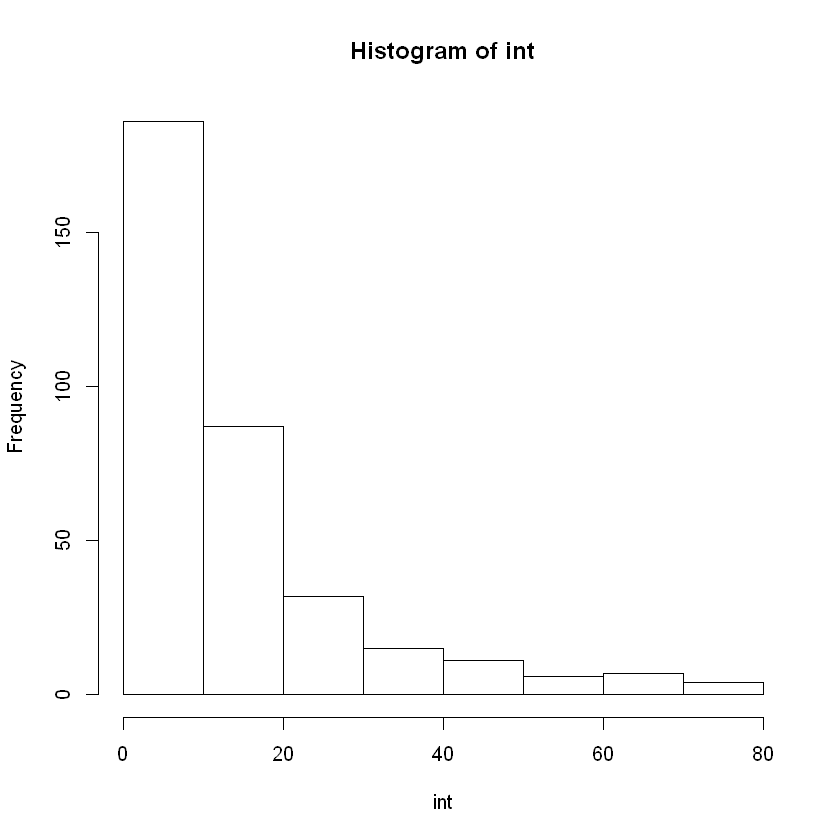

In [132]:
hist(int)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


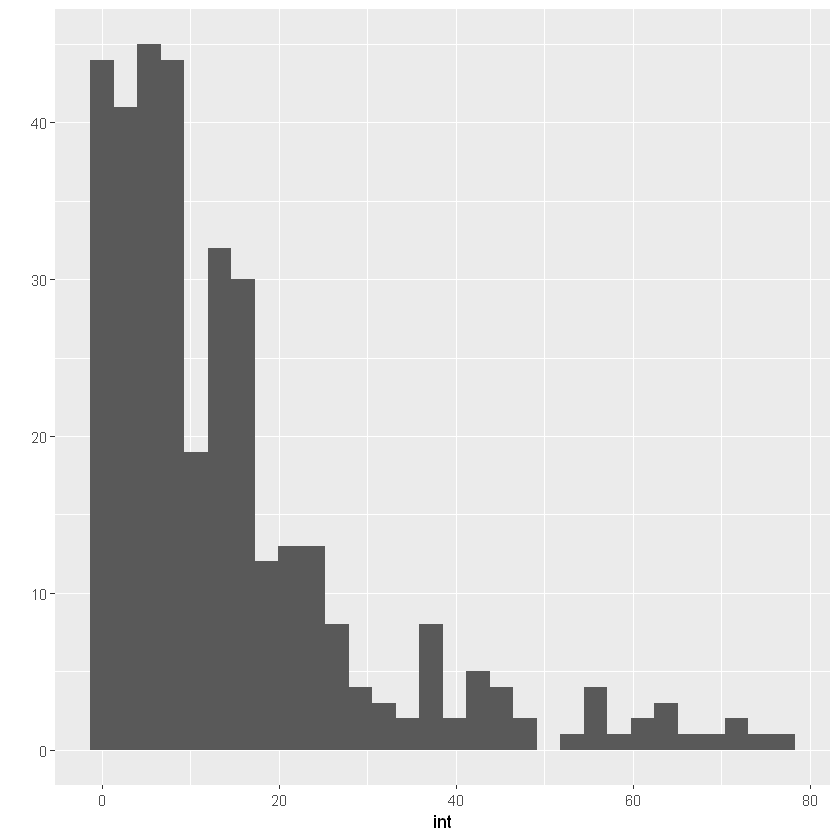

In [176]:
qplot(int)

In [5]:
# for 108
n108 = neighbors(fb, v=108);
pn108<- induced_subgraph(fb, c(108, n108));
n1108 = list(neighbors(pn108,v=3))[[1]];
int108 <- rep(1,gorder(pn108));
for (i in 2:gorder(pn108)){
    ni = list(neighbors(pn108,v=i))[[1]];
    int108[i] = length(intersect(ni,n1108));
}

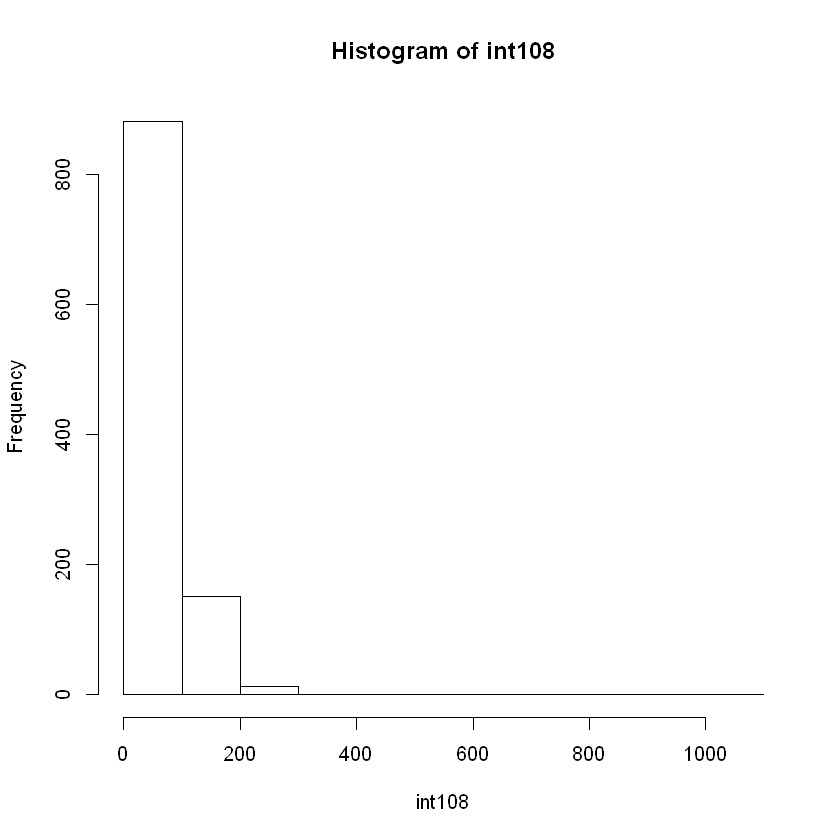

In [10]:
hist(int108)

In [6]:
dist108 <- seq_len(0)
for (i in 2:gorder(pn108)){
    n11 = neighbors(pn108,v=108);
    ni = neighbors(pn108,v=i);
    intl = intersect(ni,n11);
    npni <- induced_subgraph(pn108,intl)
    distan <- distances(npni, v=V(npni), to=V(npni))
    distan[is.infinite(distan)] <- 0
    distan <- sum(distan)/2
    dist108 = c(dist108, distan)
}

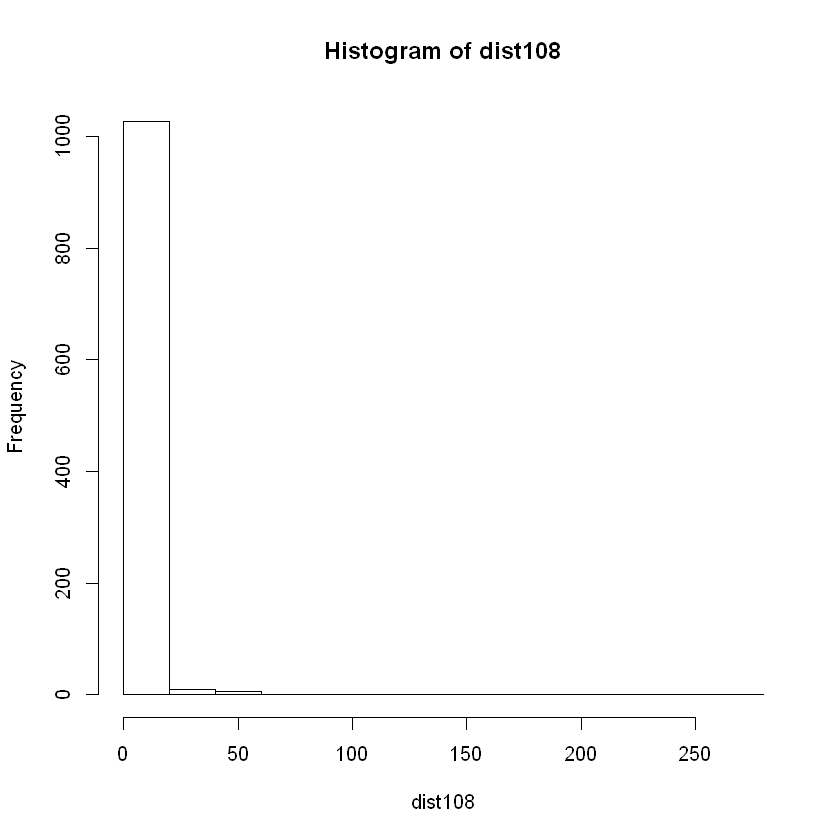

In [164]:
hist(dist108)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


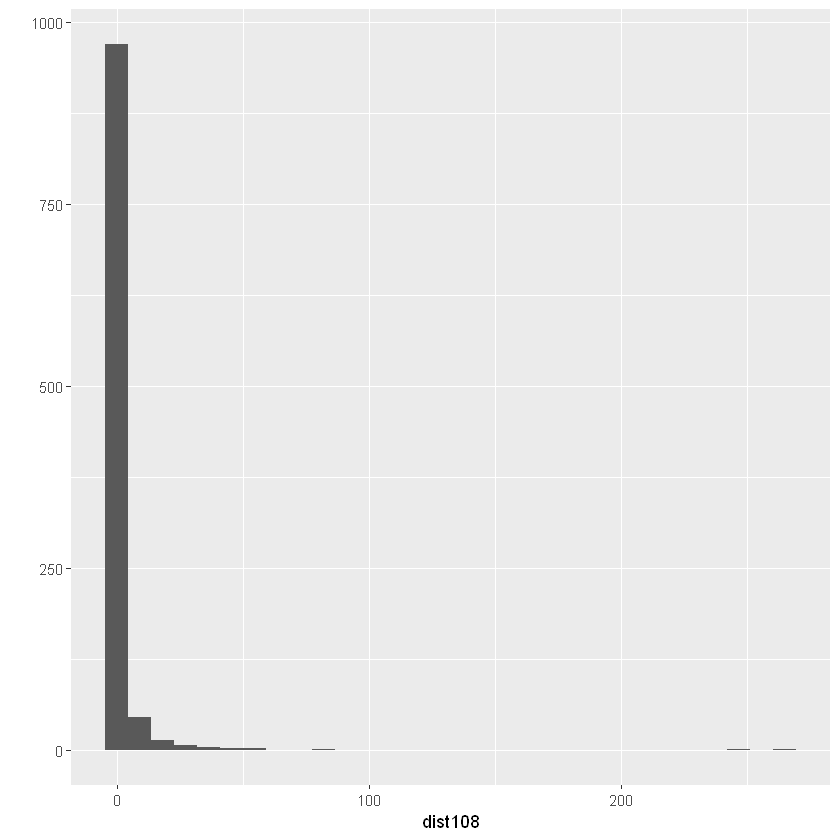

In [175]:
qplot(dist108)

In [7]:
# for 349
n349 = neighbors(fb, v=349);
pn349<- induced_subgraph(fb, c(349, n349));
n1349 = list(neighbors(pn349,v=4))[[1]];
int349 <- rep(1,gorder(pn349));
for (i in 1:gorder(pn349)){
    ni = list(neighbors(pn349,v=i))[[1]];
    int349[i] = length(intersect(ni,n1349));
}

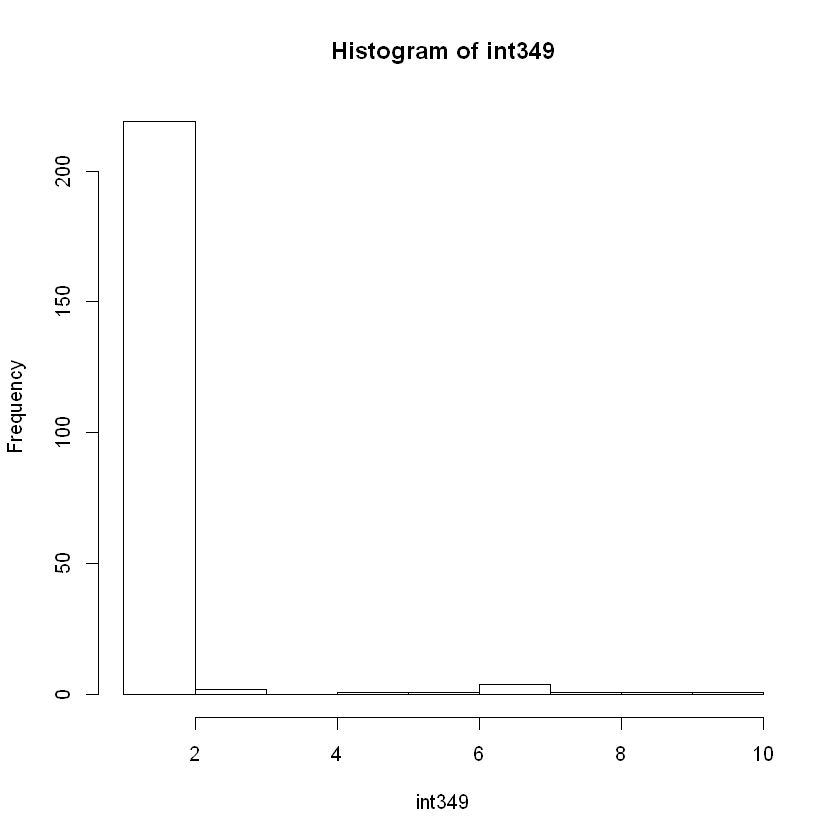

In [12]:
hist(int349)

In [8]:
dist349 <- seq_len(0)
for (i in 2:gorder(pn349)){
    n11 = neighbors(pn349,v=1);
    ni = neighbors(pn349,v=i);
    intl = intersect(ni,n11);
    npni <- induced_subgraph(pn349,intl)
    distan <- distances(npni, v=V(npni), to=V(npni))
    distan[is.infinite(distan)] <- 0
    distan <- sum(distan)/2
    dist349 = c(dist349, distan)
}

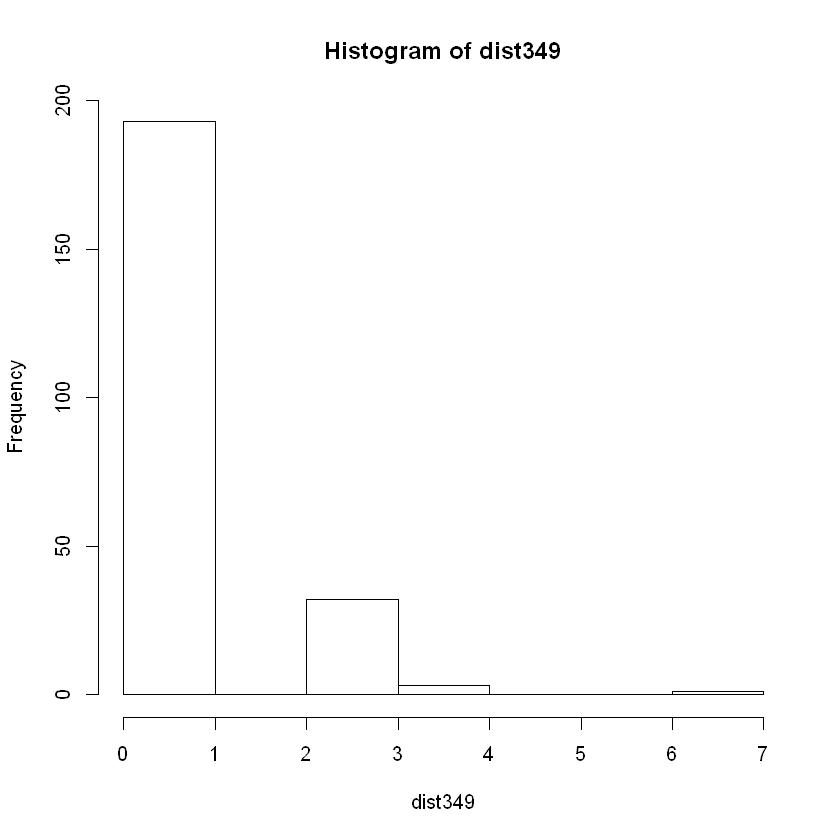

In [166]:
hist(dist349)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


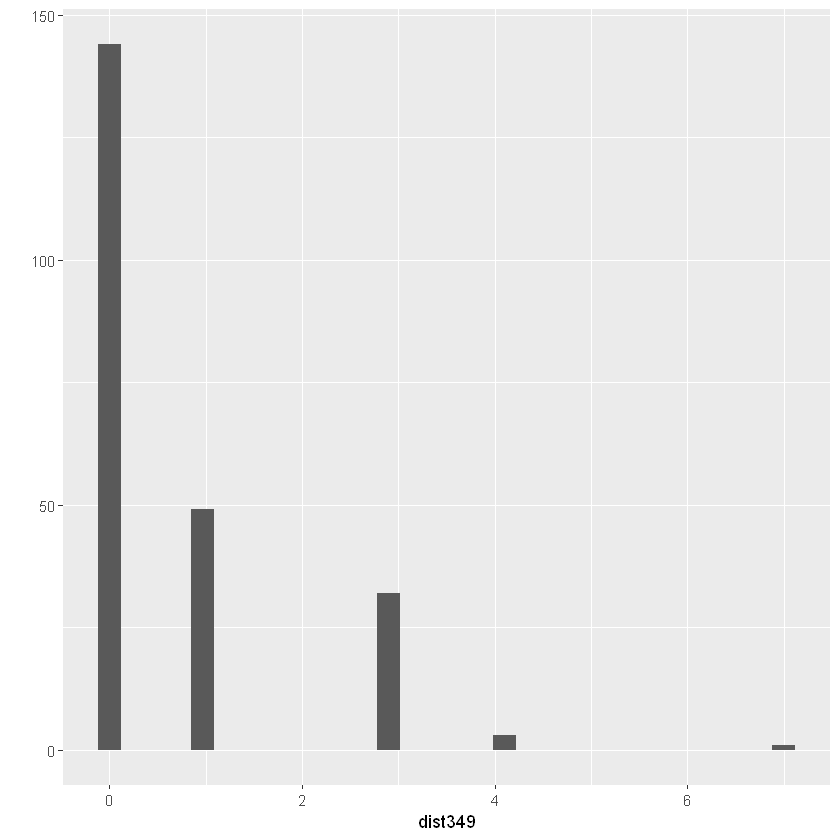

In [174]:
qplot(dist349)

In [9]:
# for 484
n484 = neighbors(fb, v=484);
pn484<- induced_subgraph(fb, c(484, n484));
n1484 = list(neighbors(pn484,v=1))[[1]];
int484 <- rep(1,gorder(pn484));
for (i in 1:gorder(pn484)){
    ni = list(neighbors(pn484,v=i))[[1]];
    int484[i] = length(intersect(ni,n1484));
}

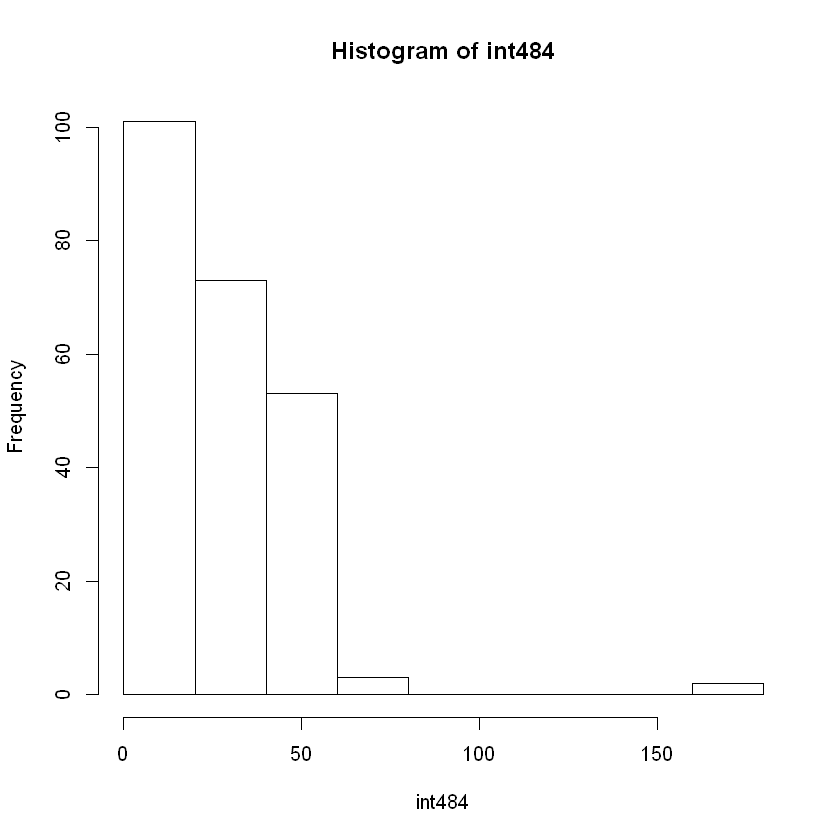

In [14]:
hist(int484)

In [10]:
dist484 <- seq_len(0)
for (i in 2:gorder(pn484)){
    n11 = neighbors(pn484,v=1);
    ni = neighbors(pn484,v=i);
    intl = intersect(ni,n11);
    npni <- induced_subgraph(pn484,intl)
    distan <- distances(npni, v=V(npni), to=V(npni))
    distan[is.infinite(distan)] <- 0
    distan <- sum(distan)/2
    dist484 = c(dist484, distan)
}

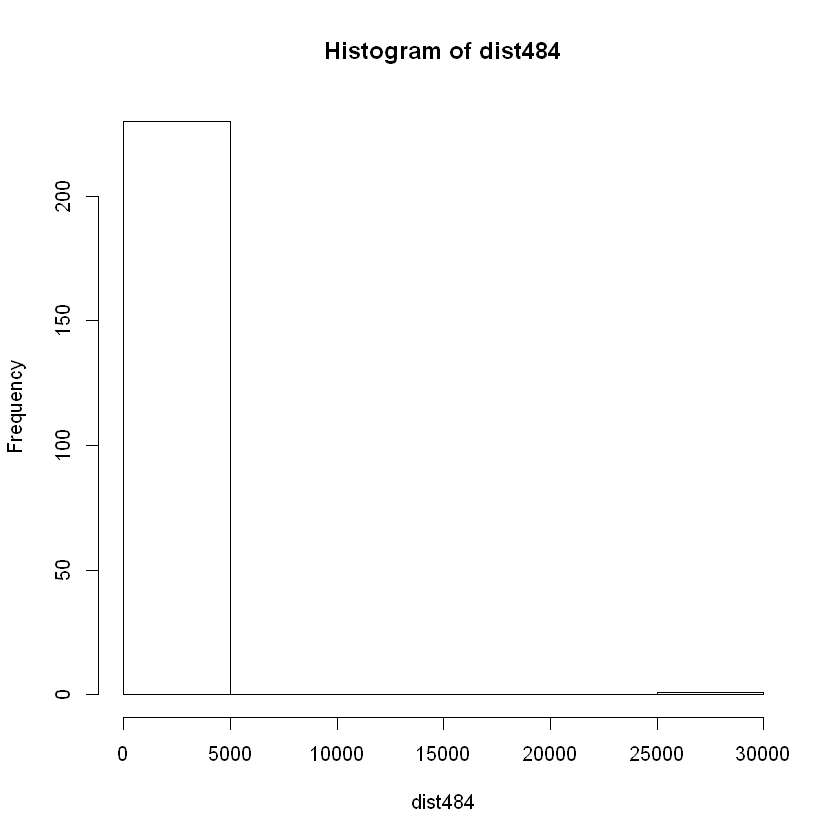

In [168]:
hist(dist484)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


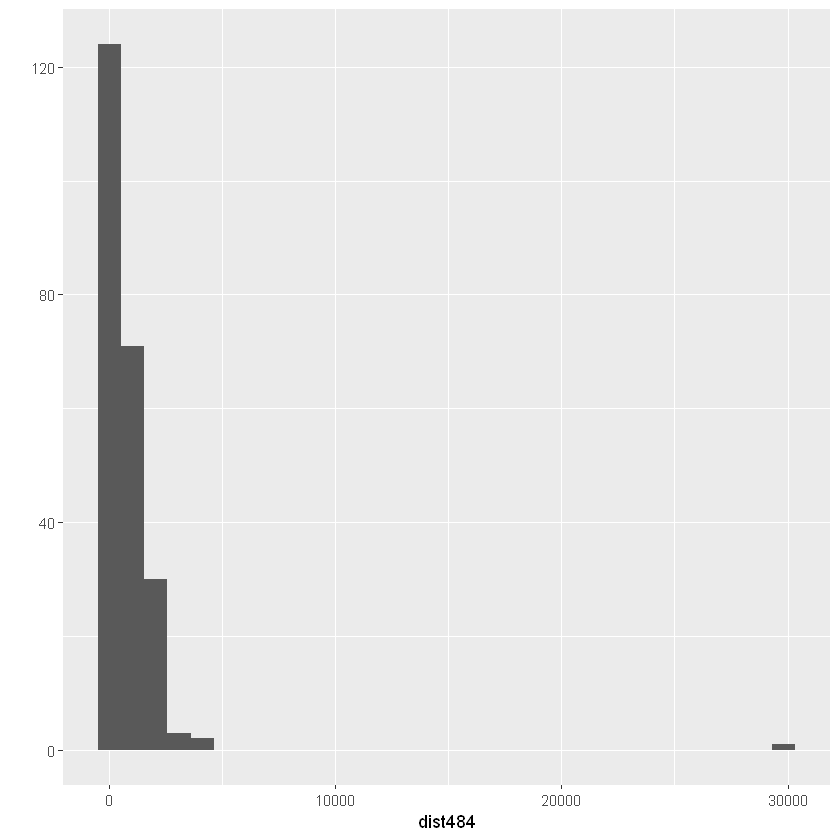

In [173]:
qplot(dist484)

In [11]:
# for 1087
n1087 = neighbors(fb, v=1087);
pn1087<- induced_subgraph(fb, c(1087, n1087));
n11087 = list(neighbors(pn1087,v=1))[[1]];
int1087 <- rep(1,gorder(pn1087));
for (i in 1:gorder(pn1087)){
    ni = list(neighbors(pn1087,v=i))[[1]];
    int1087[i] = length(intersect(ni,n11087));
}

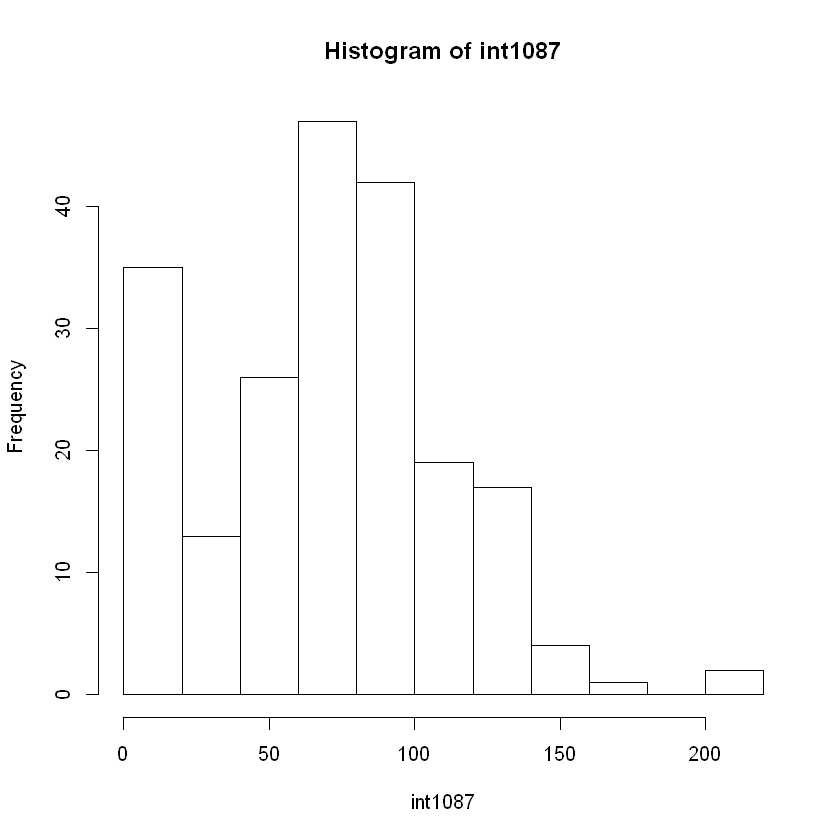

In [16]:
hist(int1087)

In [12]:
dist1087 <- seq_len(0)
for (i in 2:gorder(pn1087)){
    n11 = neighbors(pn1087,v=1);
    ni = neighbors(pn1087,v=i);
    intl = intersect(ni,n11);
    npni <- induced_subgraph(pn1087,intl)
    distan <- distances(npni, v=V(npni), to=V(npni))
    distan[is.infinite(distan)] <- 0
    distan <- sum(distan)/2
    dist1087 = c(dist1087, distan)
}

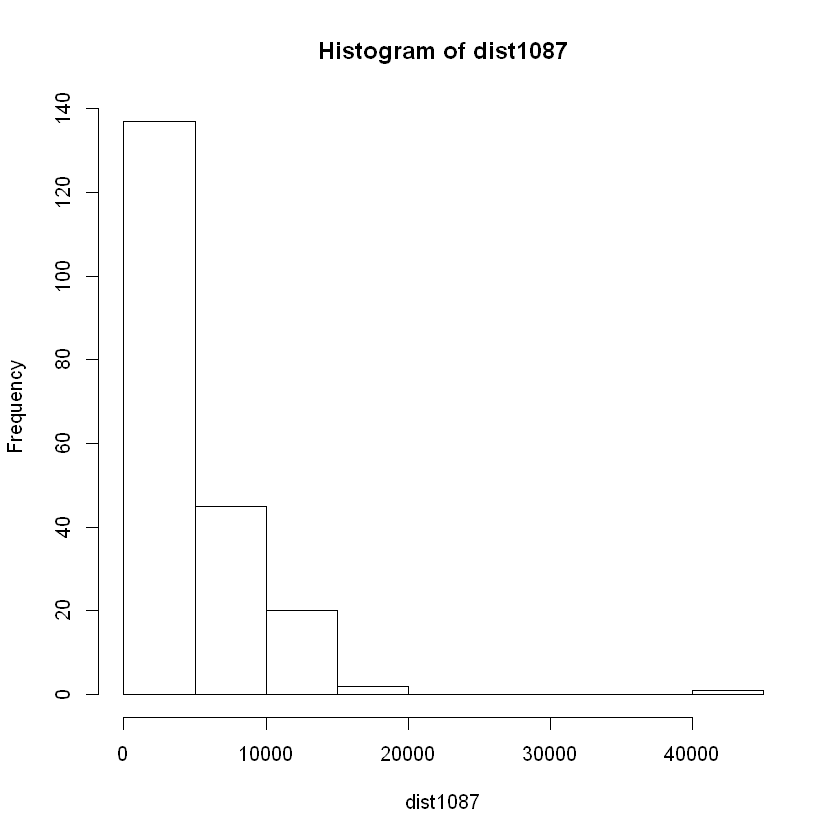

In [170]:
hist(dist1087)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


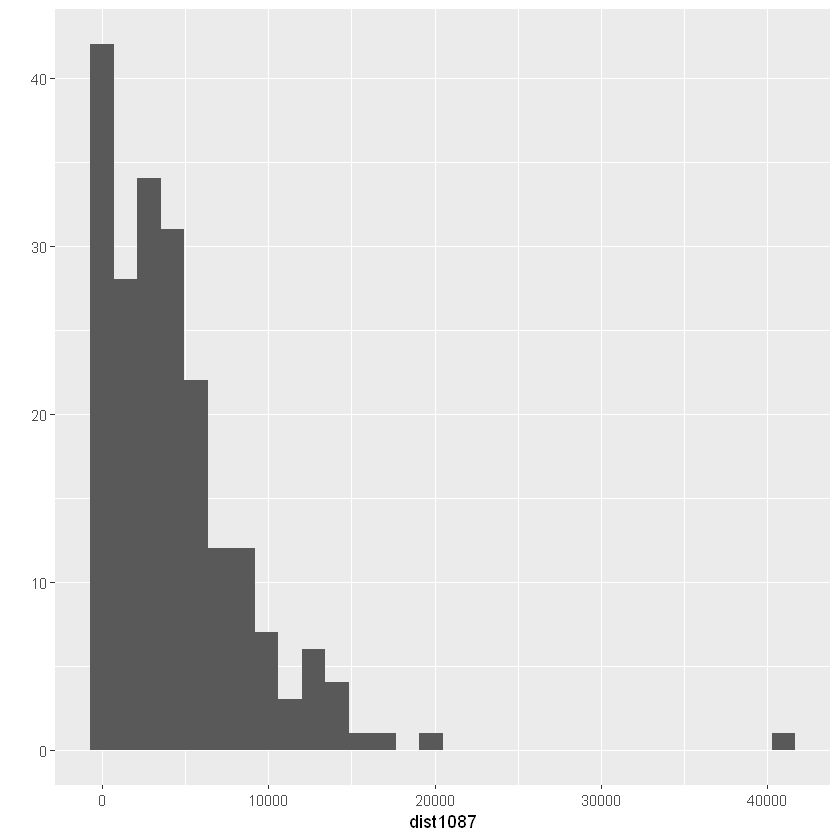

In [177]:
qplot(dist1087)

## QUESTION 13: For each of the core node's personalized network, plot the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast-Greedy algorithm. In this question, you will have 5 plots.

        [,1] [,2]
   [1,]    1    2
   [2,]    1    3
   [3,]    1    4
   [4,]    1    5
   [5,]    1    6
   [6,]    1    7
   [7,]    1    8
   [8,]    1    9
   [9,]    1   10
  [10,]    4   10
  [11,]    1   11
  [12,]    1   12
  [13,]    1   13
  [14,]    1   14
  [15,]    1   15
  [16,]    1   16
  [17,]    1   17
  [18,]    1   18
  [19,]    1   19
  [20,]    1   20
  [21,]   18   20
  [22,]    1   21
  [23,]    3   21
  [24,]   15   21
  [25,]    1   22
  [26,]   10   22
  [27,]   14   22
  [28,]    1   23
  [29,]    8   23
  [30,]    1   24
  [31,]    1   25
  [32,]    1   26
  [33,]    4   26
  [34,]   10   26
  [35,]   22   26
  [36,]    1   27
  [37,]    4   27
  [38,]   10   27
  [39,]   14   27
  [40,]   22   27
  [41,]   26   27
  [42,]    1   28
  [43,]    1   29
  [44,]   15   29
  [45,]    1   30
  [46,]   17   30
  [47,]    1   31
  [48,]   10   31
  [49,]    1   32
  [50,]    8   32
  [51,]   22   32
  [52,]   26   32
  [53,]    1   33
  [54,]    1   34
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


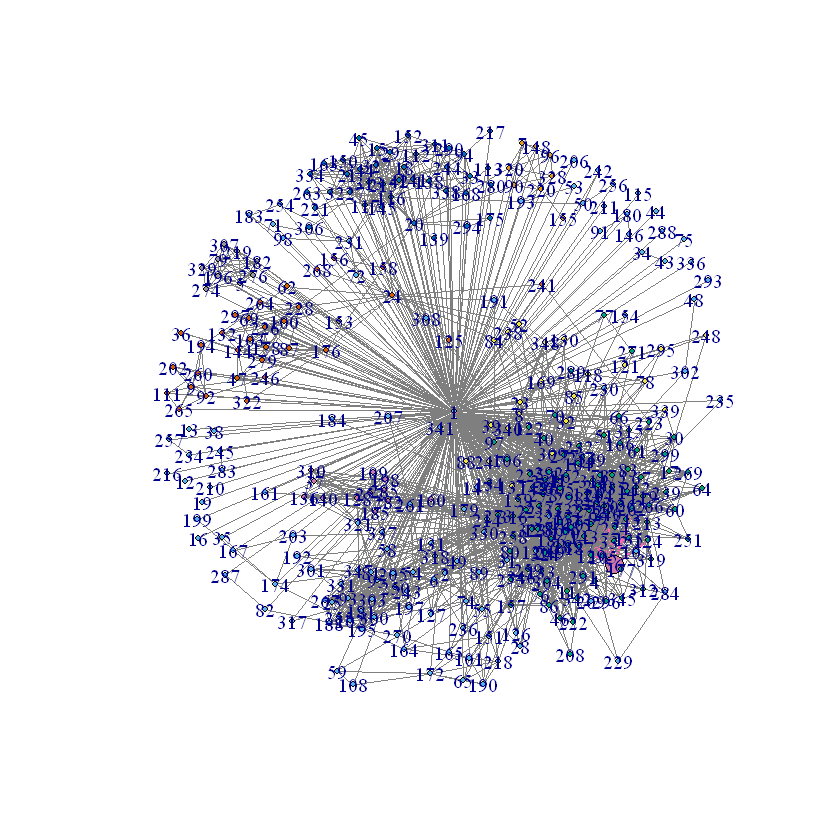

In [38]:
# for i  =1
personal_network = pn1;
community = cluster_fast_greedy(pn1);
max_disp_node = which(dist==max(dist))
edge_color = rep("grey50", length(E(personal_network)))
edge_weight = rep(0.5, length(E(personal_network)))
edgelist = get.edgelist(personal_network)
print(edgelist)
edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_disp_node)] = "hotpink";
edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == max_disp_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_disp_node)] = 3;

node_color = community$membership + 1
node_color[max_disp_node] = 7
v = rep(1,gorder(pn1))
v[1:gorder(pn1)] = 2
v[max_disp_node] = 7
print(v)
plot( pn1, vertex.color=node_color, edge.color=edge_color, edge.width=edge_weight, vertex.size = v)

         [,1] [,2]
    [1,]    1    2
    [2,]    1    3
    [3,]    2    3
    [4,]    1    4
    [5,]    2    4
    [6,]    3    4
    [7,]    3    5
    [8,]    3    6
    [9,]    5    6
   [10,]    3    7
   [11,]    5    7
   [12,]    6    7
   [13,]    3    8
   [14,]    5    8
   [15,]    6    8
   [16,]    7    8
   [17,]    3    9
   [18,]    5    9
   [19,]    6    9
   [20,]    7    9
   [21,]    8    9
   [22,]    3   10
   [23,]    5   10
   [24,]    3   11
   [25,]    5   11
   [26,]    7   11
   [27,]    9   11
   [28,]    3   12
   [29,]    5   12
   [30,]    6   12
   [31,]    9   12
   [32,]    3   13
   [33,]    5   13
   [34,]    6   13
   [35,]    8   13
   [36,]    9   13
   [37,]   11   13
   [38,]    3   14
   [39,]    5   14
   [40,]    6   14
   [41,]    7   14
   [42,]    8   14
   [43,]    9   14
   [44,]   11   14
   [45,]   13   14
   [46,]    3   15
   [47,]    5   15
   [48,]    6   15
   [49,]    7   15
   [50,]    8   15
   [51,]    9   15
   [52,]   1

   [1] 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2

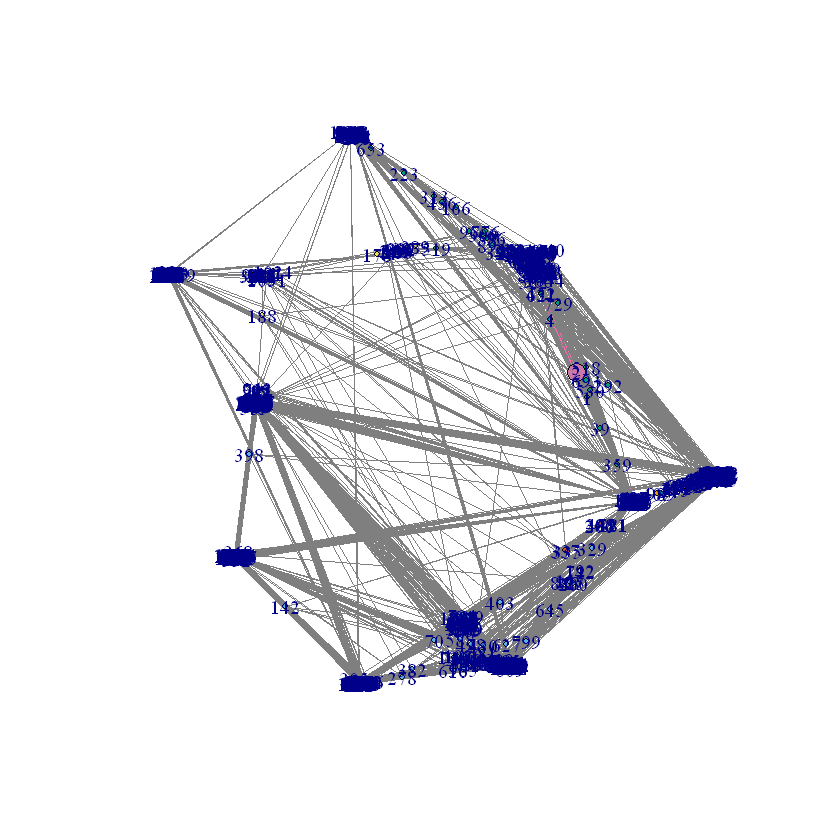

In [34]:
# for i  =108
personal_network108 = pn108;
community = cluster_fast_greedy(pn108);
max_disp_node108 = which(dist108==max(dist108))
edge_color108 = rep("grey50", length(E(personal_network108)))
edge_weight108 = rep(0.5, length(E(personal_network108)))
edgelist108 = get.edgelist(personal_network108)
print(edgelist108)
edge_color108[which(get.edgelist(personal_network108, name = FALSE)[,1] == max_disp_node108 | 
                     get.edgelist(personal_network108, name = FALSE)[,2] == max_disp_node108)] = "hotpink";
edge_weight108[which(get.edgelist(personal_network108, name = FALSE)[,1] == max_disp_node108 | 
                     get.edgelist(personal_network108, name = FALSE)[,2] == max_disp_node108)] = 3;

node_color = community$membership + 1
node_color[max_disp_node108] = 7
v = rep(1,gorder(pn108))
v[1:gorder(pn108)] = 2
v[max_disp_node108] = 7
print(v)
plot( pn108, vertex.color=node_color, edge.color=edge_color108, edge.width=edge_weight108, vertex.size = v)

        [,1] [,2]
   [1,]    1    3
   [2,]    1    5
   [3,]    2    5
   [4,]    3    5
   [5,]    4    5
   [6,]    5    6
   [7,]    5    7
   [8,]    4    8
   [9,]    5    8
  [10,]    5    9
  [11,]    2   10
  [12,]    5   10
  [13,]    5   11
  [14,]    5   12
  [15,]   11   12
  [16,]    5   13
  [17,]    5   14
  [18,]    5   15
  [19,]    5   16
  [20,]   11   16
  [21,]   12   16
  [22,]    5   17
  [23,]    5   18
  [24,]   11   18
  [25,]   12   18
  [26,]   16   18
  [27,]    5   19
  [28,]   17   19
  [29,]    2   20
  [30,]    5   20
  [31,]   10   20
  [32,]    4   21
  [33,]    5   21
  [34,]    8   21
  [35,]    5   22
  [36,]   17   22
  [37,]    2   23
  [38,]    5   23
  [39,]   10   23
  [40,]   20   23
  [41,]    5   24
  [42,]   12   24
  [43,]   16   24
  [44,]   20   24
  [45,]    5   25
  [46,]    9   25
  [47,]   20   25
  [48,]   23   25
  [49,]    5   26
  [50,]    7   26
  [51,]   14   26
  [52,]    5   27
  [53,]   10   27
  [54,]   17   27
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2


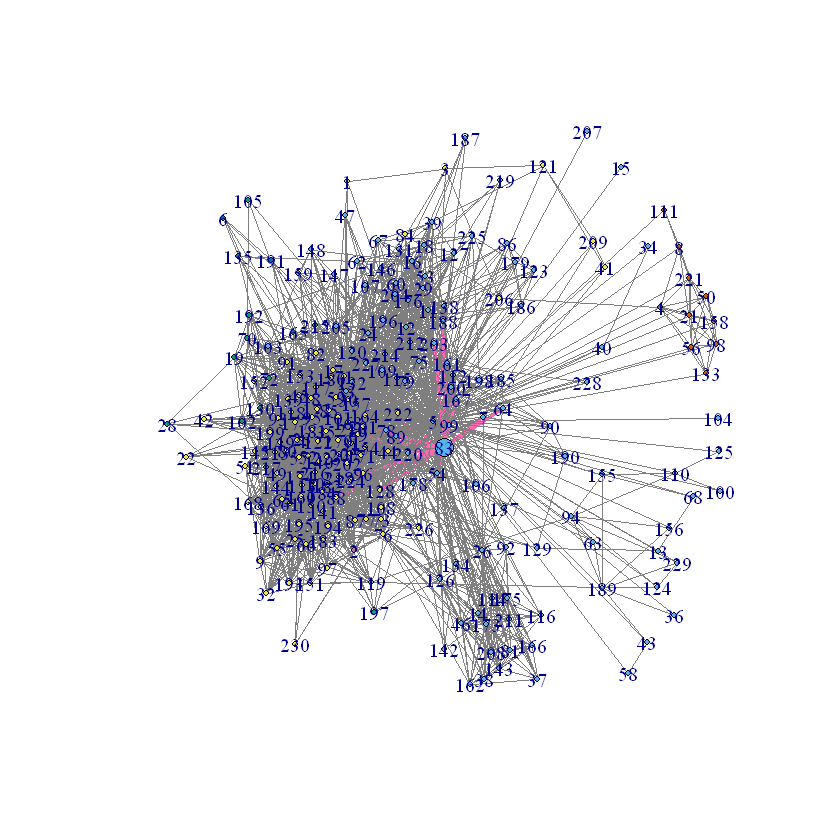

In [35]:
# for i  =349
personal_network349 = pn349;
community = cluster_fast_greedy(pn349);
max_disp_node349 = which(dist349==max(dist349))
edge_color349 = rep("grey50", length(E(personal_network349)))
edge_weight349 = rep(0.5, length(E(personal_network349)))
edgelist349 = get.edgelist(personal_network349)
print(edgelist349)
edge_color349[which(get.edgelist(personal_network349, name = FALSE)[,1] == max_disp_node349 | 
                     get.edgelist(personal_network349, name = FALSE)[,2] == max_disp_node349)] = "hotpink";
edge_weight349[which(get.edgelist(personal_network349, name = FALSE)[,1] == max_disp_node349 | 
                     get.edgelist(personal_network349, name = FALSE)[,2] == max_disp_node349)] = 3;

node_color = community$membership + 1
node_color[max_disp_node108] = 7
v = rep(1,gorder(pn349))
v[1:gorder(pn349)] = 2
v[max_disp_node349] = 7
print(v)
plot( pn349, vertex.color=node_color, edge.color=edge_color349, edge.width=edge_weight349, vertex.size = v)

        [,1] [,2]
   [1,]    1    2
   [2,]    1    3
   [3,]    2    3
   [4,]    1    4
   [5,]    2    4
   [6,]    3    4
   [7,]    1    5
   [8,]    2    5
   [9,]    3    5
  [10,]    4    5
  [11,]    2    6
  [12,]    4    6
  [13,]    2    7
  [14,]    3    7
  [15,]    4    7
  [16,]    2    8
  [17,]    3    8
  [18,]    4    8
  [19,]    5    8
  [20,]    6    8
  [21,]    7    8
  [22,]    2    9
  [23,]    4    9
  [24,]    5    9
  [25,]    7    9
  [26,]    8    9
  [27,]    1   10
  [28,]    2   10
  [29,]    3   10
  [30,]    4   10
  [31,]    5   10
  [32,]    6   10
  [33,]    7   10
  [34,]    8   10
  [35,]    9   10
  [36,]    2   11
  [37,]    4   11
  [38,]    5   11
  [39,]    6   11
  [40,]    7   11
  [41,]    8   11
  [42,]    9   11
  [43,]   10   11
  [44,]    2   12
  [45,]    4   12
  [46,]    2   13
  [47,]    3   13
  [48,]    4   13
  [49,]    7   13
  [50,]    8   13
  [51,]   10   13
  [52,]    2   14
  [53,]    3   14
  [54,]    5   14
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2


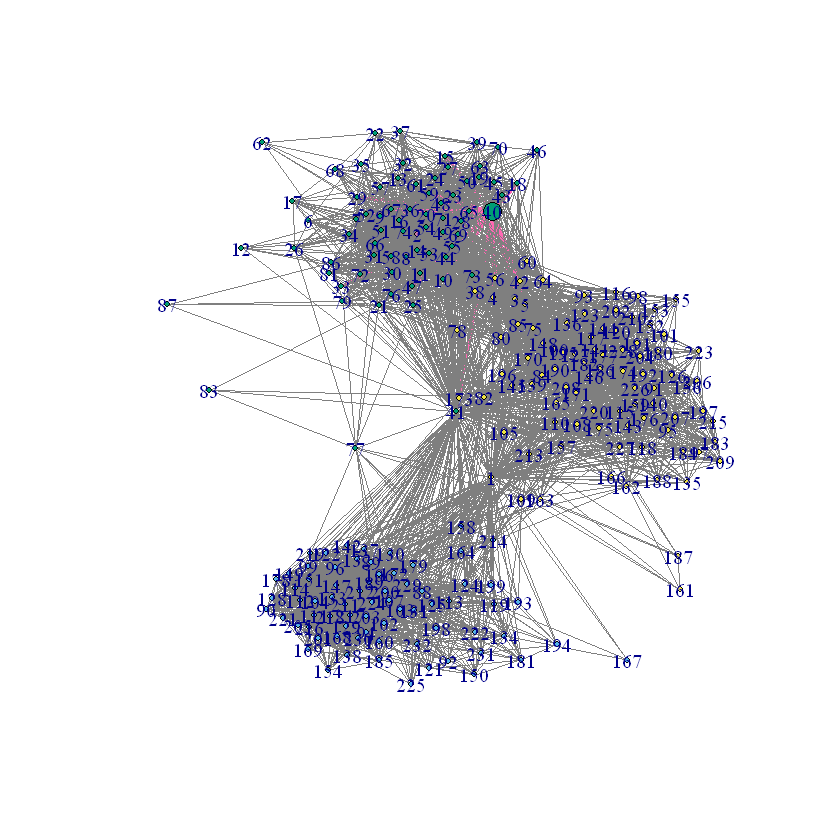

In [36]:
# for i  =484
personal_network484 = pn484;
community = cluster_fast_greedy(pn484);
max_disp_node484 = which(dist484==max(dist484))
edge_color484 = rep("grey50", length(E(personal_network484)))
edge_weight484 = rep(0.5, length(E(personal_network484)))
edgelist484 = get.edgelist(personal_network484)
print(edgelist484)
edge_color484[which(get.edgelist(personal_network484, name = FALSE)[,1] == max_disp_node484 | 
                     get.edgelist(personal_network484, name = FALSE)[,2] == max_disp_node484)] = "hotpink";
edge_weight484[which(get.edgelist(personal_network484, name = FALSE)[,1] == max_disp_node484 | 
                     get.edgelist(personal_network484, name = FALSE)[,2] == max_disp_node484)] = 3;

node_color = community$membership + 1
node_color[max_disp_node108] = 7
v = rep(1,gorder(pn484))
v[1:gorder(pn484)] = 2
v[max_disp_node484] = 7
print(v)
plot( pn484, vertex.color=node_color, edge.color=edge_color484, edge.width=edge_weight484, vertex.size = v)

        [,1] [,2]
   [1,]    1    2
   [2,]    1    3
   [3,]    2    3
   [4,]    1    4
   [5,]    2    4
   [6,]    1    5
   [7,]    2    5
   [8,]    1    6
   [9,]    2    6
  [10,]    4    6
  [11,]    5    6
  [12,]    1    7
  [13,]    1    8
  [14,]    2    8
  [15,]    3    8
  [16,]    4    8
  [17,]    1    9
  [18,]    7    9
  [19,]    1   10
  [20,]    1   11
  [21,]    7   11
  [22,]    9   11
  [23,]    1   12
  [24,]    7   12
  [25,]   11   12
  [26,]    1   13
  [27,]    7   13
  [28,]   10   13
  [29,]   11   13
  [30,]    1   14
  [31,]    1   15
  [32,]    7   15
  [33,]   11   15
  [34,]    1   16
  [35,]    7   16
  [36,]   11   16
  [37,]   15   16
  [38,]    1   17
  [39,]    7   17
  [40,]    9   17
  [41,]   12   17
  [42,]   14   17
  [43,]   16   17
  [44,]    1   18
  [45,]    9   18
  [46,]   10   18
  [47,]   17   18
  [48,]    1   19
  [49,]    7   19
  [50,]   16   19
  [51,]    1   20
  [52,]    7   20
  [53,]    9   20
  [54,]   10   20
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


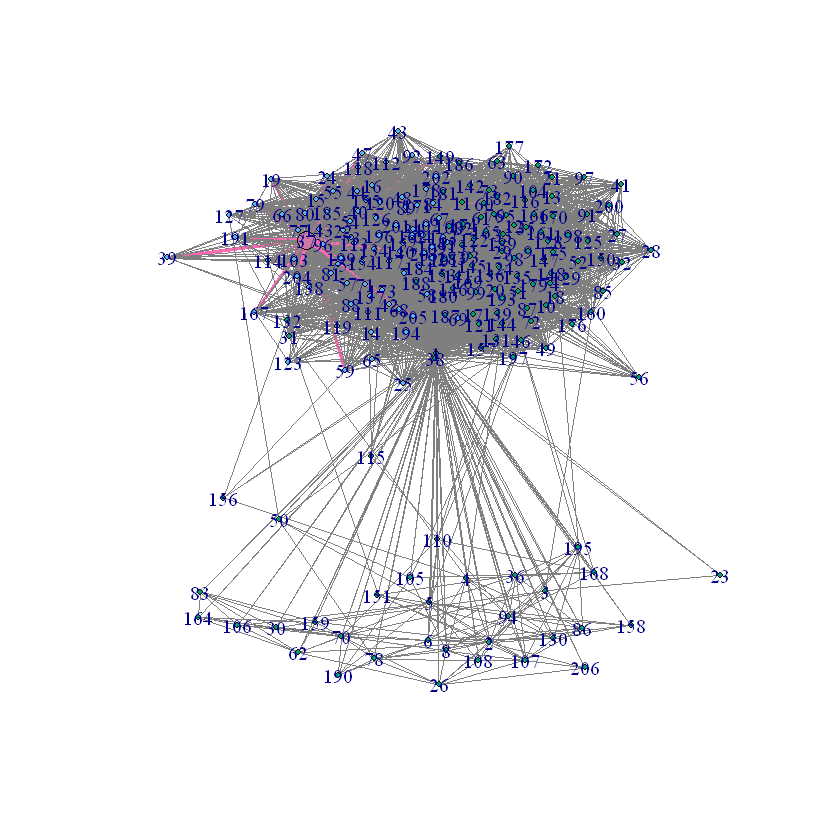

In [37]:
# for i  =1087
personal_network1087 = pn1087;
community = cluster_fast_greedy(pn1087);
max_disp_node1087 = which(dist1087==max(dist1087))
edge_color1087 = rep("grey50", length(E(personal_network1087)))
edge_weight1087 = rep(0.5, length(E(personal_network1087)))
edgelist1087 = get.edgelist(personal_network1087)
print(edgelist1087)
edge_color1087[which(get.edgelist(personal_network1087, name = FALSE)[,1] == max_disp_node1087 | 
                     get.edgelist(personal_network1087, name = FALSE)[,2] == max_disp_node1087)] = "hotpink";
edge_weight1087[which(get.edgelist(personal_network1087, name = FALSE)[,1] == max_disp_node1087 | 
                     get.edgelist(personal_network1087, name = FALSE)[,2] == max_disp_node1087)] = 3;

node_color = community$membership + 1
node_color[max_disp_node1087] = 7
v = rep(1,gorder(pn1087))
v[1:gorder(pn1087)] = 2
v[max_disp_node1087] = 7
print(v)
plot( pn1087, vertex.color=node_color, edge.color=edge_color1087, edge.width=edge_weight1087, vertex.size = v)

## QUESTION 14: Repeat Question 13, but now highlight the node with maximum embeddedness and the node with maximum dispersion embeddedness (excluding the nodes having zero embeddedness if there are any). Also, highlight the edges incident to these nodes. Report the id of those nodes.

Warning message in dist/int:
"較長的物件長度並非較短物件長度的倍數"

  [1] 2.220000e+02 2.562500e+00 2.100000e+01 2.625000e+00 1.488889e+01
  [6] 9.166667e-01 5.660000e+01 1.578947e+00 3.607143e+02 7.857143e-01
 [11] 0.000000e+00 0.000000e+00 0.000000e+00 3.933333e+00 0.000000e+00
 [16] 0.000000e+00 1.087500e+01 0.000000e+00 0.000000e+00 8.266667e+00
 [21] 2.565714e+02 9.531250e-01 7.000000e-01 7.312500e+00 2.948000e+02
 [26] 5.236765e+01 1.044776e-01 2.100000e+01 7.916667e+00 1.666667e+01
 [31] 2.568750e+01 4.545455e-01 0.000000e+00 0.000000e+00 0.000000e+00
 [36] 4.700000e+01 0.000000e+00 0.000000e+00 1.900000e+01 1.042143e+02
 [41] 9.697674e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.480000e+01
 [46] 5.454545e-01 0.000000e+00 4.360000e+02 0.000000e+00 2.433333e+01
 [51] 1.800000e+00 0.000000e+00 8.800000e+02 1.200000e+00 2.042857e+01
 [56] 3.109375e+02 2.012987e+00 7.142857e-02 6.466667e+01 1.722222e+00
 [61] 0.000000e+00 2.350000e+02 4.000000e-01 3.200000e+00 8.833333e+00
 [66] 9.454545e+00 3.330714e+02 4.533333e-01 6.750000e+00 0.000000e+00
 [71] 

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


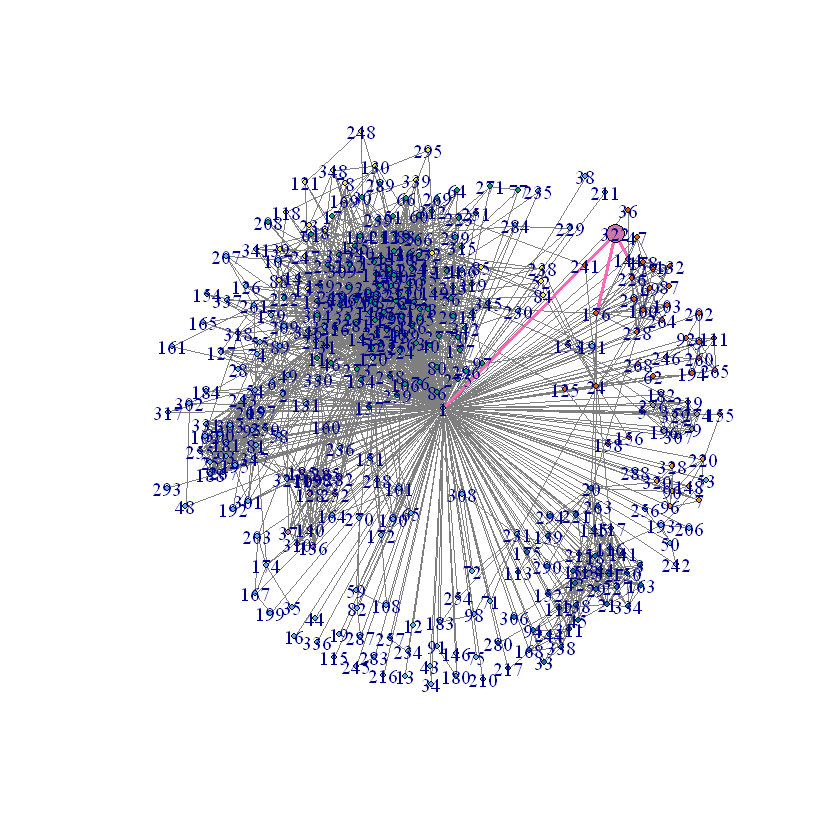

In [51]:
# for i  =1
personal_network = pn1;
community = cluster_fast_greedy(pn1);
maxem = dist/int
maxem[which(maxem==Inf)]=0;
maxem[12]=0;
maxem[210] = 0;
maxem[216] = 0;
print(maxem)
max_maxem_node = which(maxem==max(maxem))
edge_color = rep("grey50", length(E(personal_network)))
edge_weight = rep(0.5, length(E(personal_network)))
edgelist = get.edgelist(personal_network)
print(edgelist)
edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == max_maxem_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_maxem_node)] = "hotpink";
edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == max_maxem_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == max_maxem_node)] = 3;

node_color = community$membership + 1
node_color[max_maxem_node] = 7
v = rep(1,gorder(pn1))
v[1:gorder(pn1)] = 2
v[max_maxem_node] = 7
print(v)
plot( pn1, vertex.color=node_color, edge.color=edge_color, edge.width=edge_weight, vertex.size = v)

Warning message in dist108/int108:
"較長的物件長度並非較短物件長度的倍數"

   [1]  0.000000000 88.333333333  0.000000000  0.000000000  0.000000000
   [6]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [11]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [16]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [21]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [26]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [31]  0.008000000  0.000000000  0.000000000  0.000000000  0.000000000
  [36]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
  [41]  0.000000000  0.083333333  0.000000000  0.000000000  0.000000000
  [46]  0.000000000  0.125000000  0.000000000  0.000000000  0.029411765
  [51]  0.000000000  0.000000000  0.000000000  0.035714286  0.250000000
  [56]  0.057142857  0.241379310  0.000000000  0.022727273  0.000000000
  [61]  0.050000000  0.000000000  0.125000000  0.000000000  0.000000000
  [66]  0.000000000  0.000000000  0.041666667  0.000000000  0.00

   [1] 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2

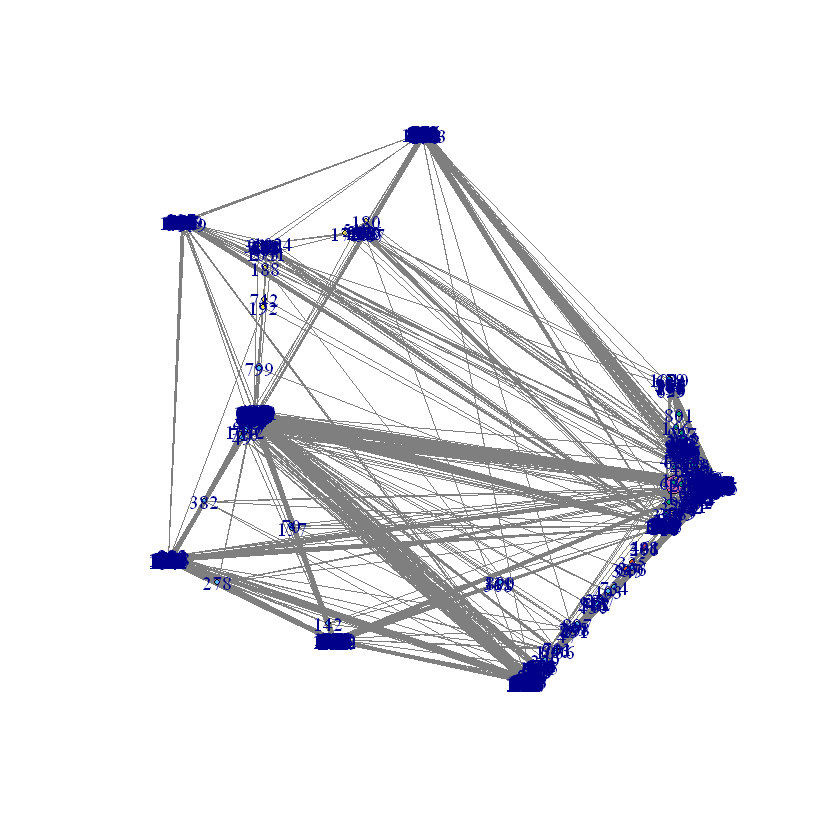

In [56]:
# for i  =108
personal_network108 = pn108;
community = cluster_fast_greedy(pn108);
maxem108=dist108/int108
maxem108[46]=0
maxem108[53]=0
maxem108[231]=0
maxem108[254]=0
maxem108[280]=0
maxem108[341]=0
maxem108[521]=0
maxem108[601]=0
maxem108[695]=0
maxem108[716]=0
maxem108[969]=0
max_maxem_node108 = which(maxem108==max(maxem108))
edge_color108 = rep("grey50", length(E(personal_network108)))
edge_weight108 = rep(0.5, length(E(personal_network108)))
edgelist108 = get.edgelist(personal_network108)

print(maxem108)
edge_color108[which(get.edgelist(personal_network108, name = FALSE)[,1] == max_maxem_node108 | 
                     get.edgelist(personal_network108, name = FALSE)[,2] == max_maxem_node108)] = "hotpink";
edge_weight108[which(get.edgelist(personal_network108, name = FALSE)[,1] == max_maxem_node108 | 
                     get.edgelist(personal_network108, name = FALSE)[,2] == max_maxem_node108)] = 3;

node_color = community$membership + 1
node_color[max_maxem_node108] = 7
v = rep(1,gorder(pn108))
v[1:gorder(pn108)] = 2
v[max_maxem_node108] = 7
print(v)
plot( pn108, vertex.color=node_color, edge.color=edge_color108, edge.width=edge_weight108, vertex.size = v)

Warning message in dist349/int349:
"較長的物件長度並非較短物件長度的倍數"

        [,1] [,2]
   [1,]    1    3
   [2,]    1    5
   [3,]    2    5
   [4,]    3    5
   [5,]    4    5
   [6,]    5    6
   [7,]    5    7
   [8,]    4    8
   [9,]    5    8
  [10,]    5    9
  [11,]    2   10
  [12,]    5   10
  [13,]    5   11
  [14,]    5   12
  [15,]   11   12
  [16,]    5   13
  [17,]    5   14
  [18,]    5   15
  [19,]    5   16
  [20,]   11   16
  [21,]   12   16
  [22,]    5   17
  [23,]    5   18
  [24,]   11   18
  [25,]   12   18
  [26,]   16   18
  [27,]    5   19
  [28,]   17   19
  [29,]    2   20
  [30,]    5   20
  [31,]   10   20
  [32,]    4   21
  [33,]    5   21
  [34,]    8   21
  [35,]    5   22
  [36,]   17   22
  [37,]    2   23
  [38,]    5   23
  [39,]   10   23
  [40,]   20   23
  [41,]    5   24
  [42,]   12   24
  [43,]   16   24
  [44,]   20   24
  [45,]    5   25
  [46,]    9   25
  [47,]   20   25
  [48,]   23   25
  [49,]    5   26
  [50,]    7   26
  [51,]   14   26
  [52,]    5   27
  [53,]   10   27
  [54,]   17   27
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2


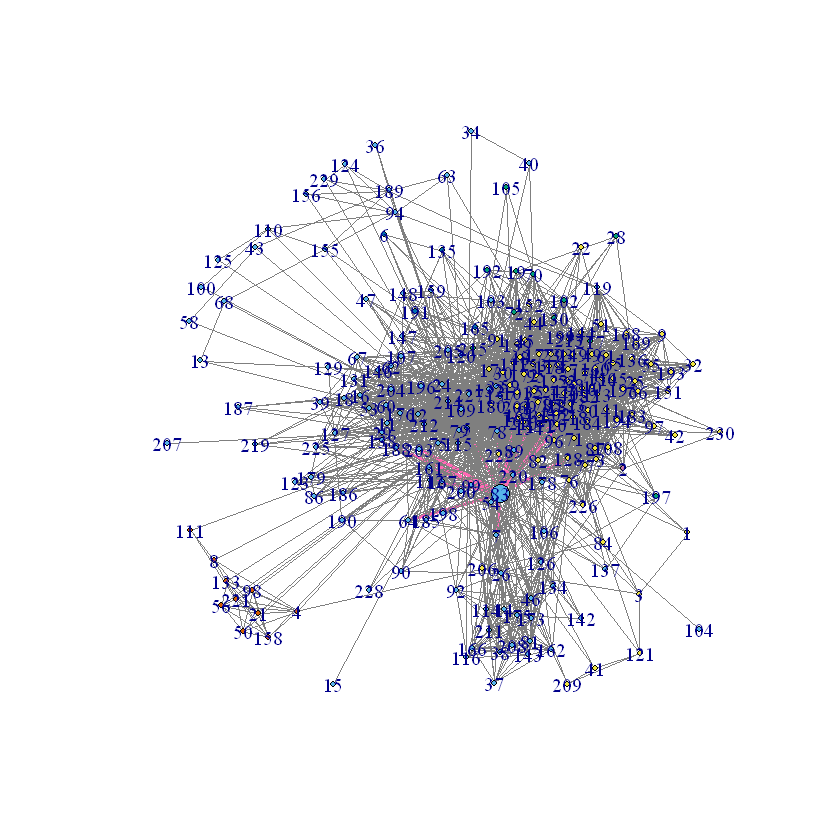

In [57]:
# for i  =349
personal_network349 = pn349;
community = cluster_fast_greedy(pn349);
maxem349=dist349/int349
max_maxem_node349 = which(maxem349==max(maxem349))
edge_color349 = rep("grey50", length(E(personal_network349)))
edge_weight349 = rep(0.5, length(E(personal_network349)))
edgelist349 = get.edgelist(personal_network349)
print(edgelist349)
edge_color349[which(get.edgelist(personal_network349, name = FALSE)[,1] == max_maxem_node349 | 
                     get.edgelist(personal_network349, name = FALSE)[,2] == max_maxem_node349)] = "hotpink";
edge_weight349[which(get.edgelist(personal_network349, name = FALSE)[,1] == max_maxem_node349 | 
                     get.edgelist(personal_network349, name = FALSE)[,2] == max_maxem_node349)] = 3;

node_color = community$membership + 1
node_color[max_maxem_node108] = 7
v = rep(1,gorder(pn349))
v[1:gorder(pn349)] = 2
v[max_maxem_node349] = 7
print(v)
plot( pn349, vertex.color=node_color, edge.color=edge_color349, edge.width=edge_weight349, vertex.size = v)

Warning message in dist484/int484:
"較長的物件長度並非較短物件長度的倍數"

        [,1] [,2]
   [1,]    1    2
   [2,]    1    3
   [3,]    2    3
   [4,]    1    4
   [5,]    2    4
   [6,]    3    4
   [7,]    1    5
   [8,]    2    5
   [9,]    3    5
  [10,]    4    5
  [11,]    2    6
  [12,]    4    6
  [13,]    2    7
  [14,]    3    7
  [15,]    4    7
  [16,]    2    8
  [17,]    3    8
  [18,]    4    8
  [19,]    5    8
  [20,]    6    8
  [21,]    7    8
  [22,]    2    9
  [23,]    4    9
  [24,]    5    9
  [25,]    7    9
  [26,]    8    9
  [27,]    1   10
  [28,]    2   10
  [29,]    3   10
  [30,]    4   10
  [31,]    5   10
  [32,]    6   10
  [33,]    7   10
  [34,]    8   10
  [35,]    9   10
  [36,]    2   11
  [37,]    4   11
  [38,]    5   11
  [39,]    6   11
  [40,]    7   11
  [41,]    8   11
  [42,]    9   11
  [43,]   10   11
  [44,]    2   12
  [45,]    4   12
  [46,]    2   13
  [47,]    3   13
  [48,]    4   13
  [49,]    7   13
  [50,]    8   13
  [51,]   10   13
  [52,]    2   14
  [53,]    3   14
  [54,]    5   14
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2


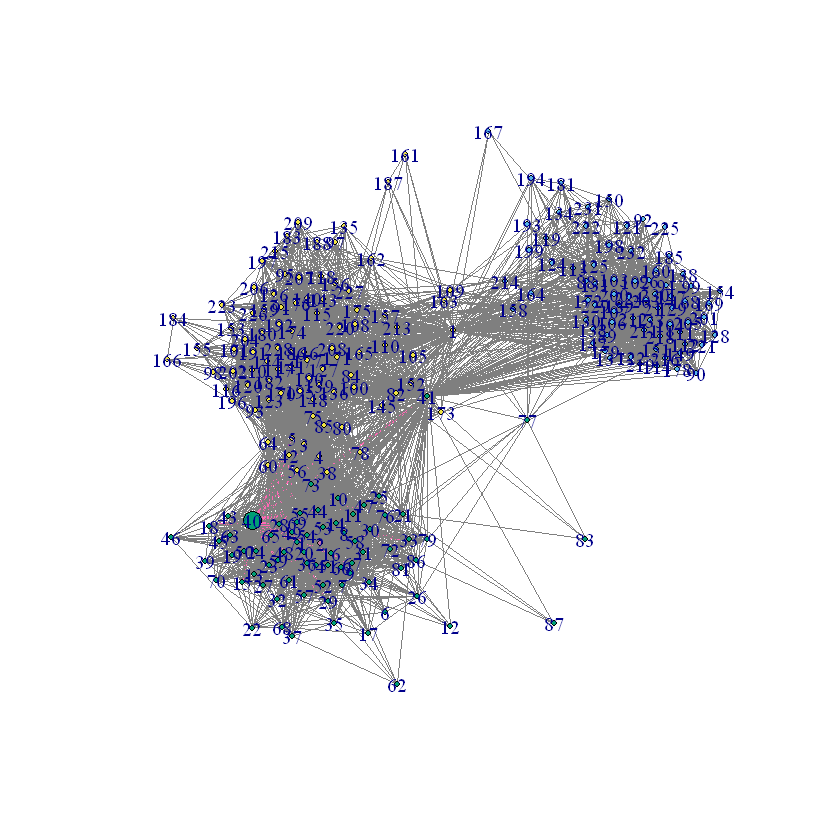

In [58]:
# for i  =484
personal_network484 = pn484;
community = cluster_fast_greedy(pn484);
maxem484 = dist484/int484
max_maxem_node484 = which(maxem484==max(maxem484))
edge_color484 = rep("grey50", length(E(personal_network484)))
edge_weight484 = rep(0.5, length(E(personal_network484)))
edgelist484 = get.edgelist(personal_network484)
print(edgelist484)
edge_color484[which(get.edgelist(personal_network484, name = FALSE)[,1] == max_maxem_node484 | 
                     get.edgelist(personal_network484, name = FALSE)[,2] == max_maxem_node484)] = "hotpink";
edge_weight484[which(get.edgelist(personal_network484, name = FALSE)[,1] == max_maxem_node484 | 
                     get.edgelist(personal_network484, name = FALSE)[,2] == max_maxem_node484)] = 3;

node_color = community$membership + 1
node_color[max_maxem_node108] = 7
v = rep(1,gorder(pn484))
v[1:gorder(pn484)] = 2
v[max_maxem_node484] = 7
print(v)
plot( pn484, vertex.color=node_color, edge.color=edge_color484, edge.width=edge_weight484, vertex.size = v)

Warning message in dist1087/int1087:
"較長的物件長度並非較短物件長度的倍數"

        [,1] [,2]
   [1,]    1    2
   [2,]    1    3
   [3,]    2    3
   [4,]    1    4
   [5,]    2    4
   [6,]    1    5
   [7,]    2    5
   [8,]    1    6
   [9,]    2    6
  [10,]    4    6
  [11,]    5    6
  [12,]    1    7
  [13,]    1    8
  [14,]    2    8
  [15,]    3    8
  [16,]    4    8
  [17,]    1    9
  [18,]    7    9
  [19,]    1   10
  [20,]    1   11
  [21,]    7   11
  [22,]    9   11
  [23,]    1   12
  [24,]    7   12
  [25,]   11   12
  [26,]    1   13
  [27,]    7   13
  [28,]   10   13
  [29,]   11   13
  [30,]    1   14
  [31,]    1   15
  [32,]    7   15
  [33,]   11   15
  [34,]    1   16
  [35,]    7   16
  [36,]   11   16
  [37,]   15   16
  [38,]    1   17
  [39,]    7   17
  [40,]    9   17
  [41,]   12   17
  [42,]   14   17
  [43,]   16   17
  [44,]    1   18
  [45,]    9   18
  [46,]   10   18
  [47,]   17   18
  [48,]    1   19
  [49,]    7   19
  [50,]   16   19
  [51,]    1   20
  [52,]    7   20
  [53,]    9   20
  [54,]   10   20
  [55,]   

  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


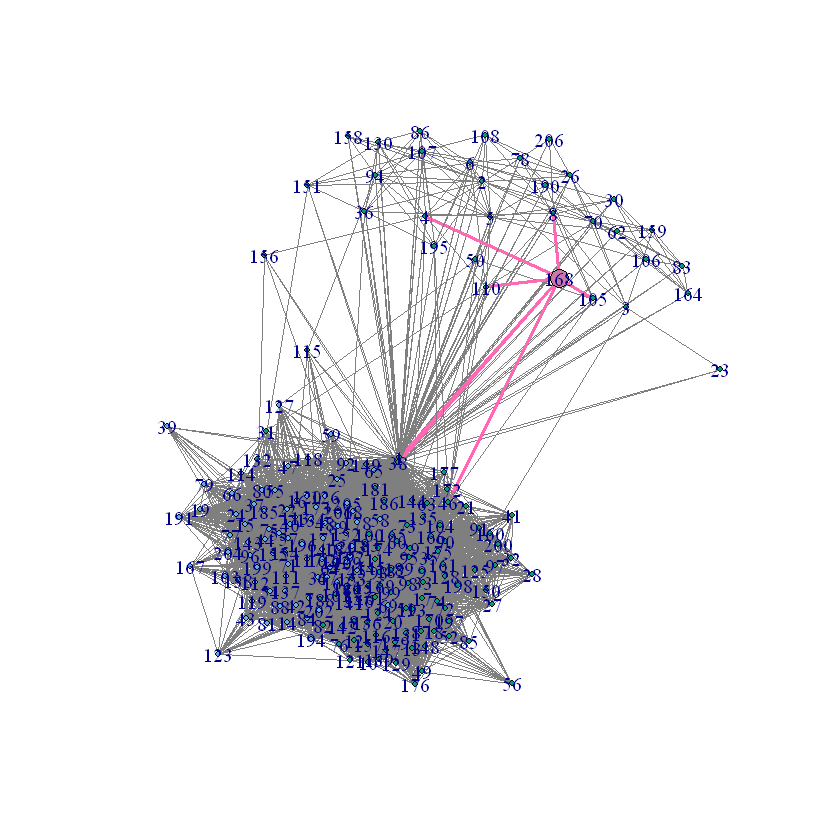

In [61]:
# for i  =1087
personal_network1087 = pn1087;
community = cluster_fast_greedy(pn1087);
maxem1087=dist1087/int1087
max_maxem_node1087 = which(maxem1087==max(maxem1087))
edge_color1087 = rep("grey50", length(E(personal_network1087)))
edge_weight1087 = rep(0.5, length(E(personal_network1087)))
edgelist1087 = get.edgelist(personal_network1087)
print(edgelist1087)
edge_color1087[which(get.edgelist(personal_network1087, name = FALSE)[,1] == max_maxem_node1087 | 
                     get.edgelist(personal_network1087, name = FALSE)[,2] == max_maxem_node1087)] = "hotpink";
edge_weight1087[which(get.edgelist(personal_network1087, name = FALSE)[,1] == max_maxem_node1087 | 
                     get.edgelist(personal_network1087, name = FALSE)[,2] == max_maxem_node1087)] = 3;

node_color = community$membership + 1
node_color[max_maxem_node1087] = 7
v = rep(1,gorder(pn1087))
v[1:gorder(pn1087)] = 2
v[max_maxem_node1087] = 7
print(v)
plot( pn1087, vertex.color=node_color, edge.color=edge_color1087, edge.width=edge_weight1087, vertex.size = v)

## QUESTION 16: What is jNrj, i.e. the length of the list Nr?

In [3]:
n415 = neighbors(fb, v=415);
nlist <- c()
for (i in 1:length(n415)){
    d = degree(fb, n415[i])
        if(d==24){
            nlist <- c(nlist, n415[i])
        }
}
print("The length of Nr")
print(length(nlist))

[1] "The length of Nr"
[1] 10


## QUESTION 17: Compute the average accuracy of the friend recommendation algorithm

In [42]:
pn415 <- induced_subgraph(fb, n415)
macc = c()
for(n in nlist){
   scores =  similarity(pn415, method = "dice")
    macc = c(macc, scores)
}
        


In [44]:
print(mean(macc))

[1] 0.1454323


In [46]:
pn415 <- induced_subgraph(fb, n415)
maccj = c()
for(n in nlist){
   scores =  similarity(pn415, method = "jaccard")
    maccj = c(macc, scores)
}

print(mean(maccj))

[1] 0.1418059


In [47]:
pn415 <- induced_subgraph(fb, n415)
macca = c()
for(n in nlist){
   scores =  similarity(pn415, method = "invlogweighted")
    macca = c(macc, scores)
}

print(mean(macca))

[1] 0.2354601


## Google +

In [3]:
edge_list <- read.table("/Users/李冠旻/gplus_combined.txt");
node_list1<-names(table(edge_list$V1));
node_list2<-names(table(edge_list$V2));
node_list<- union(node_list1, node_list2);

net<- graph_from_data_frame(d=edge_list, vertices=node_list, directed=TRUE)

## QUESTION 18: How many personal networks are there?

In [12]:
files = list.files(path="gplus", pattern="*.circles")
num = 0
for (file in files){
  circle = paste("gplus", file, sep="/")
  if (length(readLines(circle)) > 2){
    num = num + 1
  }
}
print(num)

[1] 57


## QUESTION 19: For the 3 personal networks (node ID given below), plot the in-degree and out-degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.

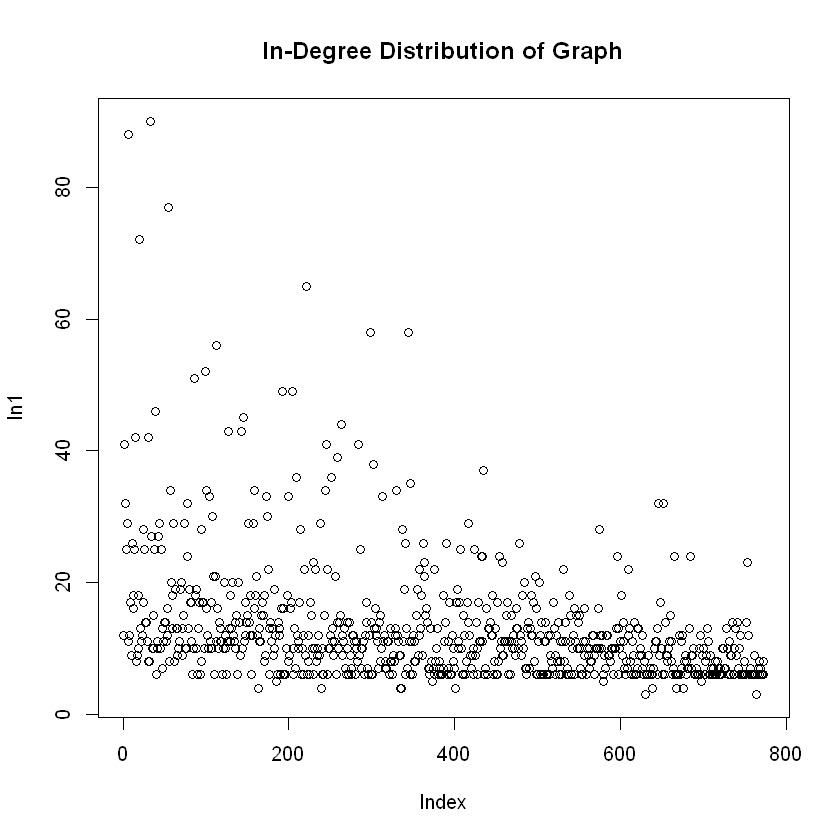

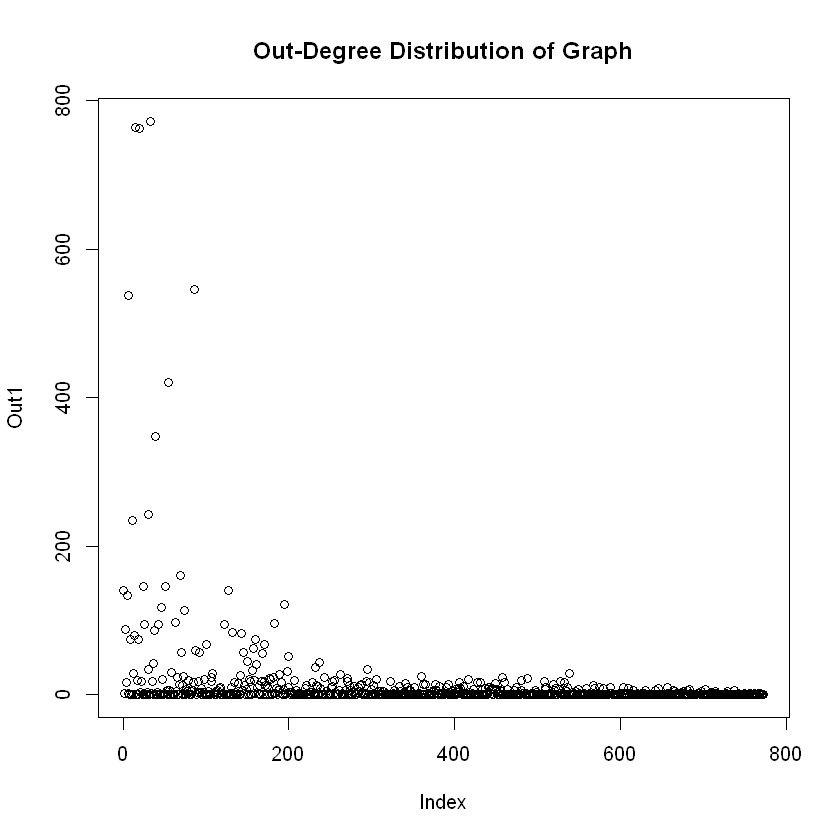

In [25]:
edge1 = "gplus/109327480479767108490.edges"
gp1 = read_graph(edge1, format="ncol", directed=TRUE)
In1 = degree(gp1, mode = "in")
plot(In1, main = "In-Degree Distribution of Graph")
Out1 = degree(gp1, mode = "out")
plot(Out1, main = "Out-Degree Distribution of Graph")

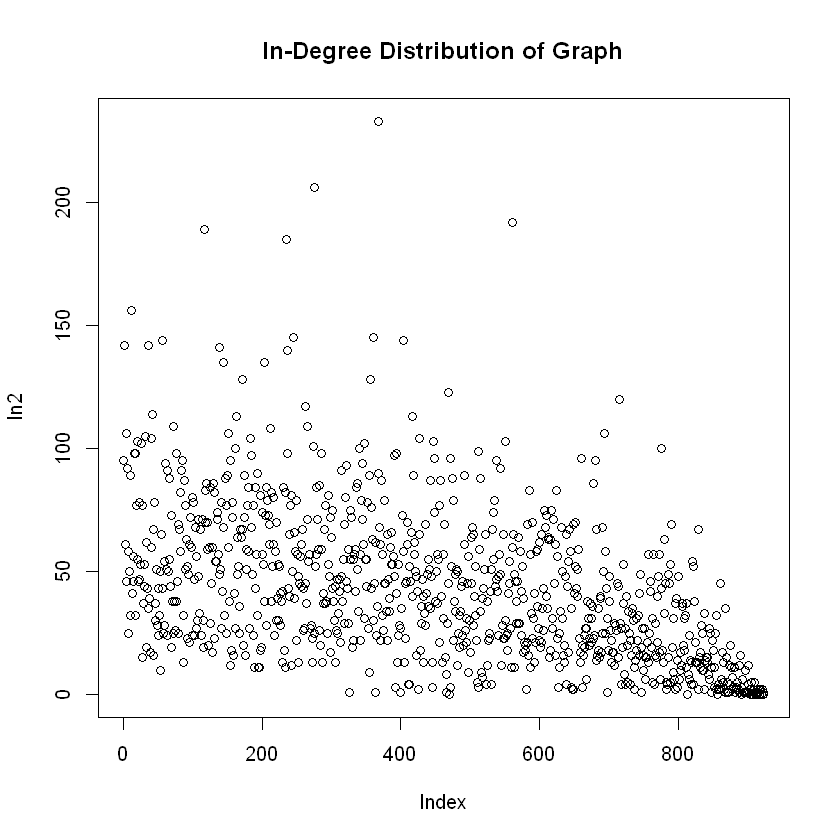

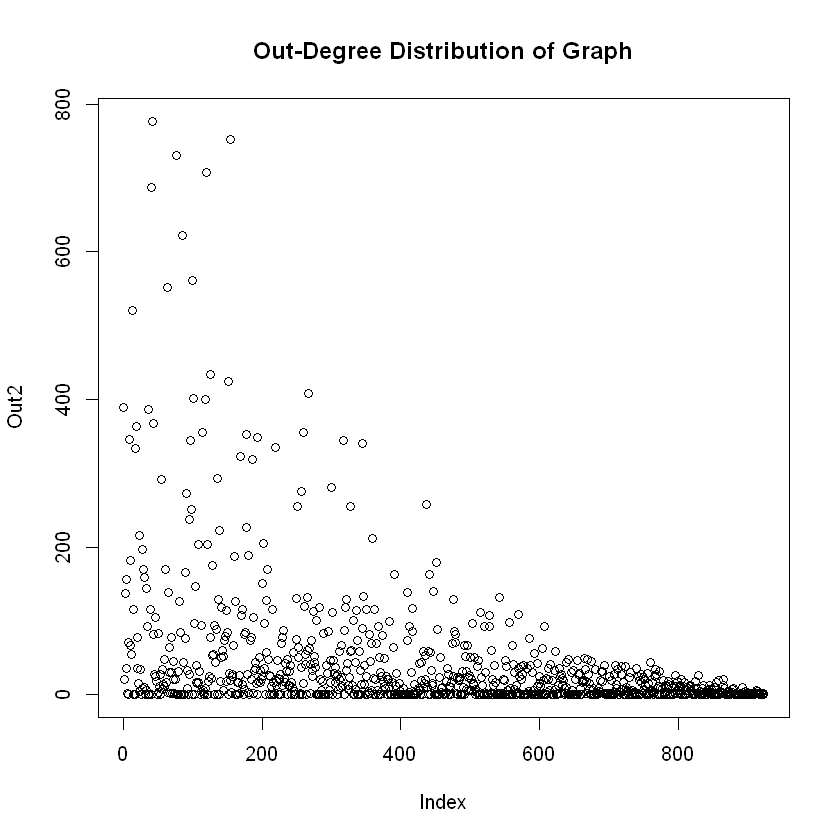

In [26]:
edge2 = "gplus/115625564993990145546.edges"
gp2 = read_graph(edge2, format="ncol", directed=TRUE)
In2 = degree(gp2, mode = "in")
plot(In2, main = "In-Degree Distribution of Graph")
Out2 = degree(gp2, mode = "out")
plot(Out2, main = "Out-Degree Distribution of Graph")

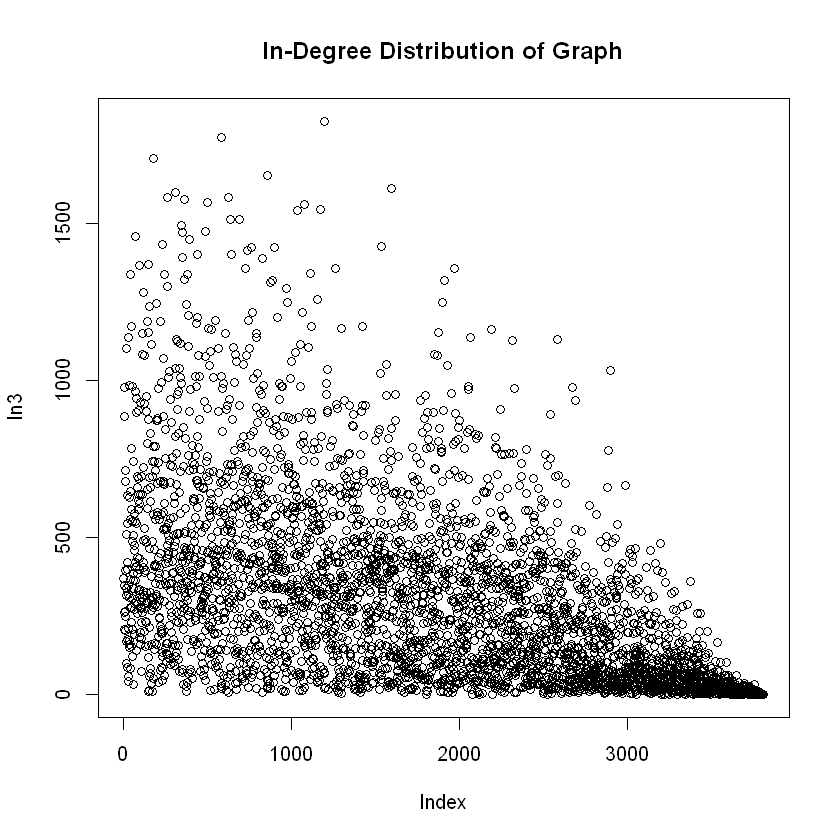

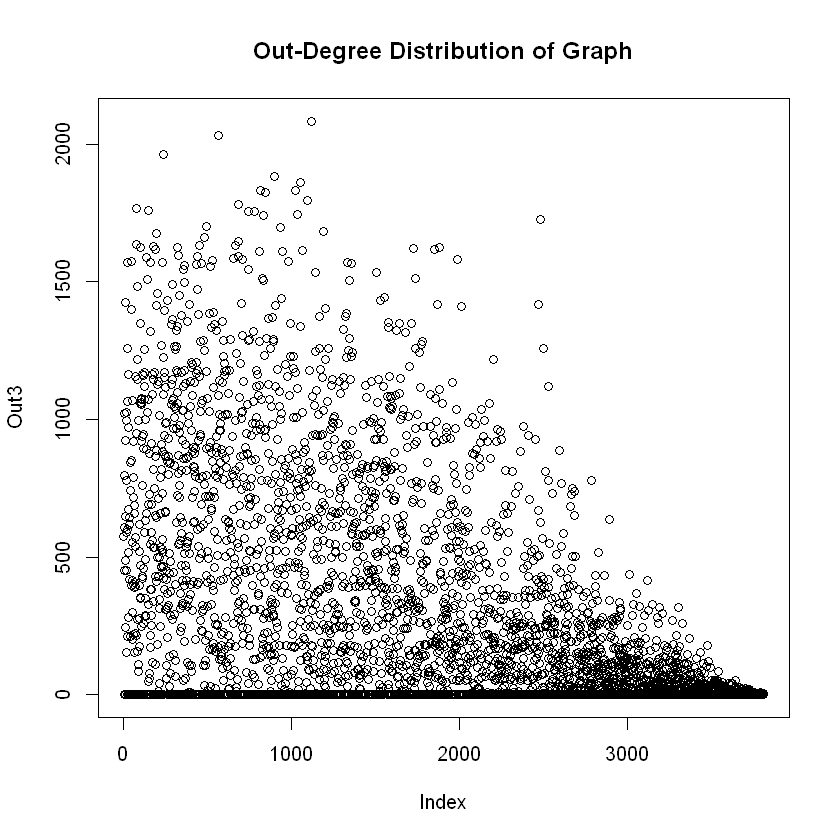

In [28]:
edge3 = "gplus/101373961279443806744.edges"
gp3 = read_graph(edge3, format="ncol", directed=TRUE)
In3 = degree(gp3, mode = "in")
plot(In3, main = "In-Degree Distribution of Graph")
Out3 = degree(gp3, mode = "out")
plot(Out3, main = "Out-Degree Distribution of Graph")

[1] 0.2798194

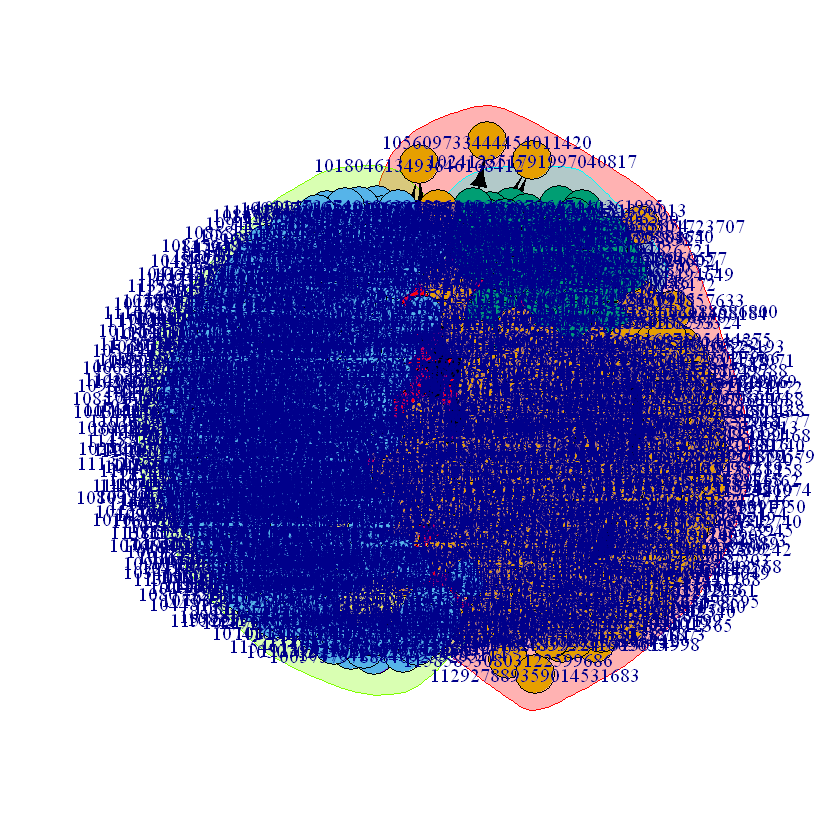

In [35]:
com1<-walktrap.community(gp1)
plot(com1,gp1)
modularity(com1)

[1] 0.3230868

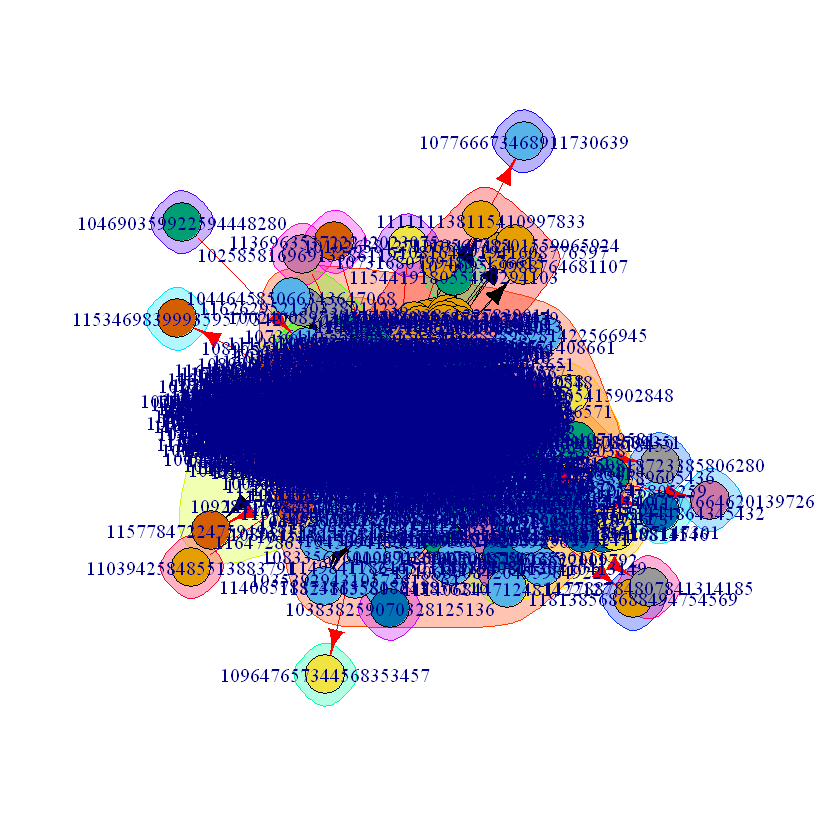

In [36]:
com2<-walktrap.community(gp2)
plot(com2,gp2)
modularity(com2)

[1] 0.1950912

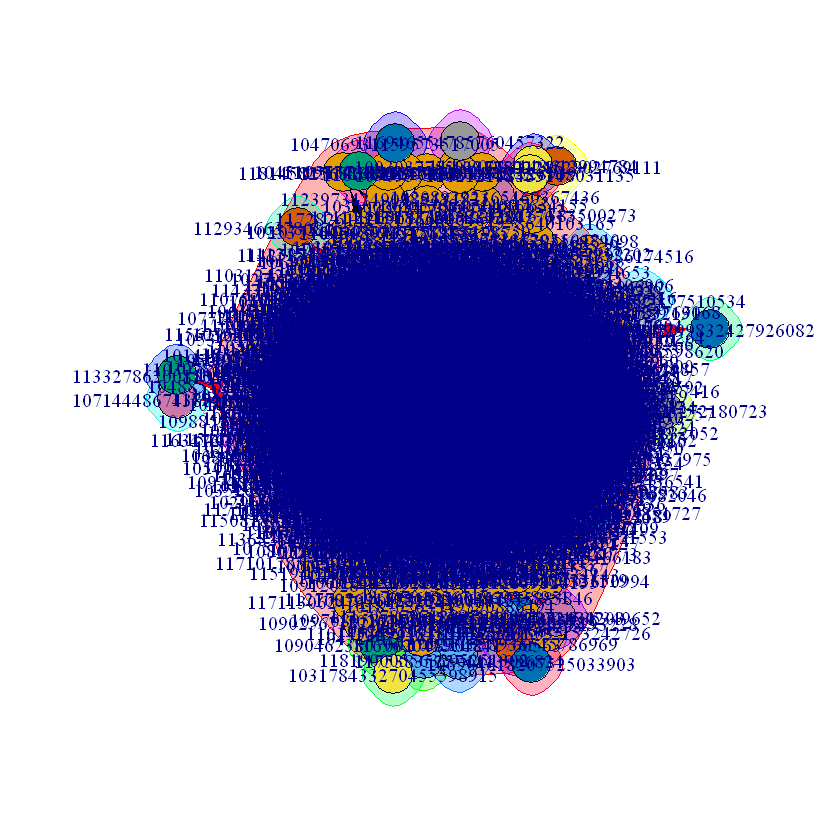

In [37]:
com3<-walktrap.community(gp3)
plot(com3,gp3)
modularity(com3)

In [2]:
library(entropy)
library(infotheo)


Attaching package: 'infotheo'

The following objects are masked from 'package:entropy':

    discretize, entropy



In [41]:
edge1 = "gplus/109327480479767108490.edges"
gp1 = read_graph(edge1, format="ncol", directed=TRUE)
com1<-cluster_walktrap(gp1)

In [82]:
# preprocessing the data
node1 = "109327480479767108490"
cr1 = paste("gplus/", node1, ".circles", sep = "")
circle_data = readLines(cr1)

# store elements and sets
cre = c()
crs = c()
for (i in 1:length(circle_data)){
    elements = strsplit(circle_data[i],"\t")
    cre = c(cre, elements[2:length(circle_data)])
    crs = c(crs, rep(i,length(elements)))
}

com11 = 0
com22 = 0
com33 = 0
com = c(com11, com22, com33)
# store community 
for (j in 1:length(membership(com1))){
    id = membership(com1)[j]
    com = c(com, com11, com22, com33)
    if( id == 1){
        com11 = com11 +1;
    } else if (id == 2) {
        com22 = com22 + 1;
    } else {
        com33 = com33 +1;
    }
}


print(length(crs))
print(length(com))

c = entropy(crs)
k = entropy(com)
ck = condentropy(crs, com)
kc = condentropy(com, crs)
h = 1- ck/c
c = 1 - kc/k
print(h)
print(c)

[1] 3
[1] 2322
[1] 0.4382694
[1] 0.08667091


In [56]:
edge2 = "gplus/115625564993990145546.edges"
gp2 = read_graph(edge2, format="ncol", directed=TRUE)
com2<-walktrap.community(gp2)

In [87]:
# preprocessing the data
node2 = "115625564993990145546"
cr2 = paste("gplus/", node2, ".circles", sep = "")
circle_data2 = readLines(cr2)

# store elements and sets
cre2 = c()
crs2 = c()
for (i in 1:length(circle_data2)){
    elements = strsplit(circle_data2[i],"\t")
    cre2 = c(cre2, elements[2:length(circle_data2)])
    crs2 = c(crs2, rep(i,length(elements)))
}

com2n = array(0, dim=c(1,31))
max = 0
# store community 
for (j in 1:length(membership(com2))){
    id = membership(com2)[j]
    com2n[id] = com2n[id] +1
}

com2n = c(com2n)
c2 = entropy(crs2)
k2 = entropy(com2n)
ck2 = condentropy(crs2, com2n)
kc2 = condentropy(com2n, crs2)
h2 = 1- ck2/c2
c2 = 1 - kc2/k2
print(h2)
print(c2)

[1] 0.4335422
[1] 1


In [88]:
edge3 = "gplus/101373961279443806744.edges"
gp3 = read_graph(edge3, format="ncol", directed=TRUE)
com3<-walktrap.community(gp3)

In [111]:
node3= "101373961279443806744"
cr3 = paste("gplus/", node3, ".circles", sep = "")
circle_data3 = readLines(cr3)

# store elements and sets
cre3 = c()
crs3 = array(1, dim=c(1,29))
for (i in 1:length(circle_data3)){
    elements = strsplit(circle_data3[i],"\t")
    cre3 = c(cre3, elements[2:length(circle_data3)])
    crs3[i] =rep(i, length(elements))
}

com3n = array(0, dim=c(1,29))
max = 0
# store community 
for (j in 1:length(membership(com3))){
    id = membership(com3)[j]
    com3n[id] = com3n[id] +1
}
print(com3n)
com3n = c(com3n)
c3 = entropy(crs3[1:3])
print(c3)
k3 = entropy(com3n)
ck3 = condentropy(crs3, com3n)
kc3 = condentropy(com3n, crs3)
h3 = 1- ck3/c3
c3 = 1 - kc3/k3
print(h3)
print(c3)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 2895  892    1    1    1    1    1    1    1     1     1     1     1     1
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     1     1     1     1     1     1     1     1     1     1     1     1
     [,27] [,28] [,29]
[1,]     1     1     1
[1] 1.098612
[1] 1
[1] 0
